# Test

In [1]:
# Import necessary libraries
# =====================================================================
import os

# Configurar el nivel de logging para mostrar solo errores
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import configparser
import tensorflow as tf
import pandas as pd

# Import src code
from src.model.model_build import *
from src.utils.utils import PROJECT_DIR, DATA_PATH
from src.visualization import visualize
from src.model.overfitting_test import *
from src.data.create_dataset import dataset_tf
from src.data.path_loader import PathLoader

In [2]:
# Use the GPU
# =====================================================================
gpus_list = tf.config.list_physical_devices("GPU")
gpu = gpus_list[0]
tf.config.experimental.set_memory_growth(gpu, True)

print("GPUs Available: ", gpus_list)

GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Set config file
# =====================================================================
config = configparser.ConfigParser()
config.read(PROJECT_DIR / "config.ini")

# Hyperparameters
config_hp = config["hyperparameters"]

IMG_SIZE = 64
NUM_CLASSES = int(config_hp["num_classes"])
BATCH_SIZE = 32
EPOCHS = 500
T = 1000
BETA_START = float(config_hp["beta_start"])
BETA_END = float(config_hp["beta_end"])
s = float(config_hp["s"])  # scale factor for the variance curve
SCHEDULER = config_hp["scheduler"]

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # TODO: ADD TO CONFIG FILE
loss_fn = tf.keras.losses.MeanSquaredError()

## 1. Dataset

- The shape of the dataset is: (32, 64, 64, 3) => batch_size: 32, height: 64, width: 64, channels: 3
- The shape of the dataset labels is: (32, 18) => batch_size: 32, number of labels: 18


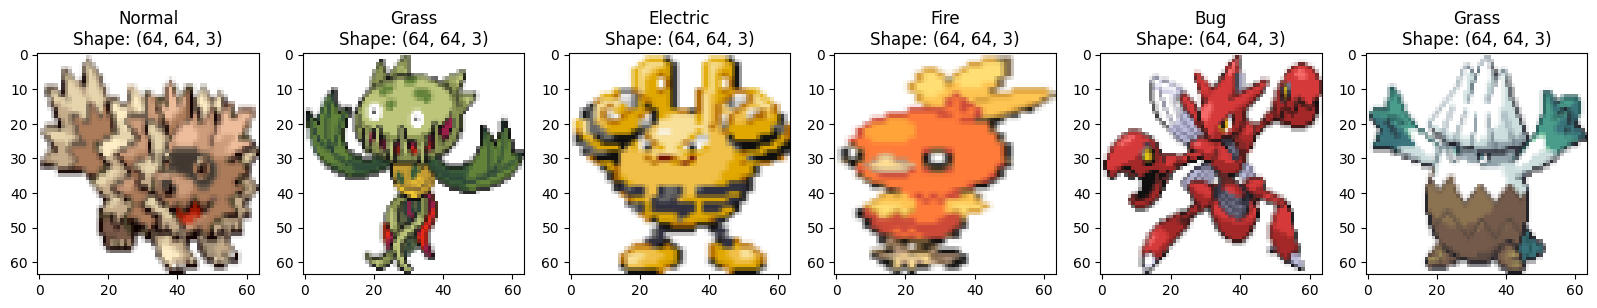

In [4]:
# Load csv data
# =====================================================================
path = f"{DATA_PATH}/processed/pokedex_cleaned.csv"
df = pd.read_csv(path)

dataset_path = f"{DATA_PATH}/processed/pokemon_tf_dataset"
# poke_dataset = tf.data.Dataset.load(path=dataset_path, compression="GZIP")

poke_dataset = dataset_tf(
    image_paths=PathLoader.get_image_paths(f"{DATA_PATH}/interim/image_paths.json"),
    df=df,
    img_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    save=False,
    save_path=dataset_path,
)

# Check the dataset
# =====================================================================
for img, label in poke_dataset.take(1):
    print(
        f"- The shape of the dataset is: {img.shape} => batch_size: {img.shape[0]}, height: {img.shape[1]}, width: {img.shape[2]}, channels: {img.shape[3]}"
    )
    print(
        f"- The shape of the dataset labels is: {label.shape} => batch_size: {label.shape[0]}, number of labels: {label.shape[1]}"
    )

# Visualize the dataset
visualize.plot_images_batch(dataset_tf=poke_dataset, n=6)

## 2. Model

In [5]:
# Create the model
# =====================================================================
u_net = build_unet(IMG_SIZE, NUM_CLASSES, num_channels=128, embedding_dim=128)
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model = DiffusionModel(
    u_net, IMG_SIZE, NUM_CLASSES, T, BETA_START, BETA_END, s, "linear"
)

# Compile the model
# =====================================================================
model.compile(loss=loss_fn, optimizer=optimizer)

### 2.1. Training

Epoch 1/500


I0000 00:00:1715272865.427271    7069 service.cc:145] XLA service 0x78f380002c70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715272865.427294    7069 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
W0000 00:00:1715272866.001626    7069 random_ops.cc:105] Warning: Using tf.random.uniform with XLA compilation will ignore seeds; consider using tf.random.stateless_uniform instead if reproducible behavior is desired. random_uniform
I0000 00:00:1715272868.031277    7194 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_6896', 32 bytes spill stores, 32 bytes spill loads

I0000 00:00:1715272868.278081    7191 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_6896', 40 bytes spill stores, 40 bytes spill loads

I0000 00:00:1715272869.534813    7185 asm_compiler.cc:369] ptxas war

127/127 ━━━━━━━━━━━━━━━━━━━━ 86s 328ms/step - loss: 0.5909
Epoch 2/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step - loss: 0.1676
Epoch 3/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - loss: 0.1577
Epoch 4/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - loss: 0.1627
Epoch 5/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - loss: 0.1207
Epoch 6/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - loss: 0.1012
Epoch 7/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 332ms/step - loss: 0.1045
Epoch 8/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 332ms/step - loss: 0.1303
Epoch 9/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step - loss: 0.1158
Epoch 10/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 327ms/step - loss: 0.1089
Epoch 11/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - loss: 0.0766
Epoch 12/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 338ms/step - loss: 0.1314
Epoch 13/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 338ms/step - loss: 0.0908
Epoch 14/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 334ms/step - loss: 0.0966
Epoch 15/500


Sampling sprite: 1000it [01:00, 16.61it/s]                        


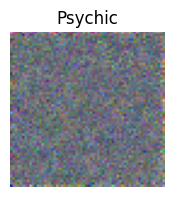

127/127 ━━━━━━━━━━━━━━━━━━━━ 103s 815ms/step - loss: 0.1105
Epoch 21/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 327ms/step - loss: 0.1237
Epoch 22/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - loss: 0.0883
Epoch 23/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - loss: 0.1195
Epoch 24/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 0.0910
Epoch 25/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 335ms/step - loss: 0.1013
Epoch 26/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 0.0889
Epoch 27/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 0.0799
Epoch 28/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 334ms/step - loss: 0.0534
Epoch 29/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 0.0874
Epoch 30/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 337ms/step - loss: 0.0869
Epoch 31/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 0.0561
Epoch 32/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 335ms/step - loss: 0.0664
Epoch 33/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 0.1017
Epoc

Sampling sprite: 1000it [00:58, 17.07it/s]                        


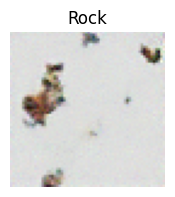

127/127 ━━━━━━━━━━━━━━━━━━━━ 102s 803ms/step - loss: 0.0532
Epoch 41/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 327ms/step - loss: 0.0674
Epoch 42/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - loss: 0.1083
Epoch 43/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step - loss: 0.0594
Epoch 44/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 334ms/step - loss: 0.0609
Epoch 45/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 0.0570
Epoch 46/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 335ms/step - loss: 0.0833
Epoch 47/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 334ms/step - loss: 0.0630
Epoch 48/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 0.0626
Epoch 49/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 0.0710
Epoch 50/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 334ms/step - loss: 0.0855
Epoch 51/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 336ms/step - loss: 0.0587
Epoch 52/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 336ms/step - loss: 0.0675
Epoch 53/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 334ms/step - loss: 0.0653
Epoc

Sampling sprite: 1000it [00:58, 17.04it/s]                        


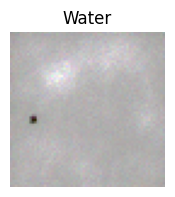

127/127 ━━━━━━━━━━━━━━━━━━━━ 102s 803ms/step - loss: 0.0779
Epoch 61/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 327ms/step - loss: 0.0514
Epoch 62/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 328ms/step - loss: 0.0572
Epoch 63/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - loss: 0.0611
Epoch 64/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step - loss: 0.0702
Epoch 65/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - loss: 0.0661
Epoch 66/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 332ms/step - loss: 0.0855
Epoch 67/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 0.0702
Epoch 68/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 332ms/step - loss: 0.0595
Epoch 69/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 0.0736
Epoch 70/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 0.0733
Epoch 71/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 334ms/step - loss: 0.0594
Epoch 72/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 334ms/step - loss: 0.0730
Epoch 73/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 334ms/step - loss: 0.0624
Epoc

Sampling sprite: 1000it [00:59, 16.95it/s]                        


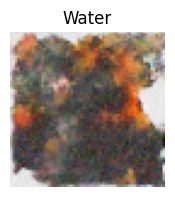

127/127 ━━━━━━━━━━━━━━━━━━━━ 102s 806ms/step - loss: 0.0485
Epoch 81/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 327ms/step - loss: 0.0717
Epoch 82/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - loss: 0.0881
Epoch 83/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step - loss: 0.0573
Epoch 84/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 0.0615
Epoch 85/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 332ms/step - loss: 0.0664
Epoch 86/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 335ms/step - loss: 0.0470
Epoch 87/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 336ms/step - loss: 0.0627
Epoch 88/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 334ms/step - loss: 0.0447
Epoch 89/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 45s 357ms/step - loss: 0.0512
Epoch 90/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 341ms/step - loss: 0.0572
Epoch 91/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 341ms/step - loss: 0.0659
Epoch 92/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 339ms/step - loss: 0.0660
Epoch 93/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 44s 345ms/step - loss: 0.0751
Epoc

Sampling sprite: 1000it [00:58, 17.01it/s]                        


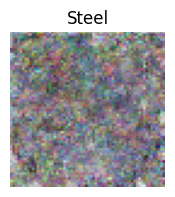

127/127 ━━━━━━━━━━━━━━━━━━━━ 102s 806ms/step - loss: 0.0477
Epoch 101/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 326ms/step - loss: 0.0487
Epoch 102/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 326ms/step - loss: 0.0629
Epoch 103/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 326ms/step - loss: 0.0646
Epoch 104/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 327ms/step - loss: 0.0635
Epoch 105/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 326ms/step - loss: 0.0551
Epoch 106/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 335ms/step - loss: 0.0526
Epoch 107/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 334ms/step - loss: 0.0716
Epoch 108/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - loss: 0.0457
Epoch 109/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 332ms/step - loss: 0.0512
Epoch 110/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - loss: 0.0501
Epoch 111/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - loss: 0.0469
Epoch 112/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - loss: 0.0818
Epoch 113/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - loss

Sampling sprite: 1000it [01:00, 16.60it/s]                        


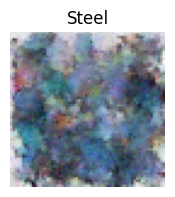

127/127 ━━━━━━━━━━━━━━━━━━━━ 103s 811ms/step - loss: 0.0602
Epoch 121/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0357
Epoch 122/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0610
Epoch 123/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0622
Epoch 124/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0466
Epoch 125/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 322ms/step - loss: 0.0607
Epoch 126/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 325ms/step - loss: 0.0570
Epoch 127/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 326ms/step - loss: 0.0521
Epoch 128/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 325ms/step - loss: 0.0402
Epoch 129/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - loss: 0.0392
Epoch 130/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 328ms/step - loss: 0.0498
Epoch 131/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 337ms/step - loss: 0.0437
Epoch 132/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 334ms/step - loss: 0.0447
Epoch 133/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 334ms/step - loss

Sampling sprite: 1000it [00:59, 16.74it/s]                        


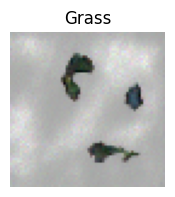

127/127 ━━━━━━━━━━━━━━━━━━━━ 102s 803ms/step - loss: 0.0507
Epoch 141/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0409
Epoch 142/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 323ms/step - loss: 0.0560
Epoch 143/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 323ms/step - loss: 0.0587
Epoch 144/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0476
Epoch 145/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0556
Epoch 146/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0522
Epoch 147/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0553
Epoch 148/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0608
Epoch 149/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0484
Epoch 150/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 326ms/step - loss: 0.0379
Epoch 151/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - loss: 0.0508
Epoch 152/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - loss: 0.0614
Epoch 153/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 43s 338ms/step - loss

Sampling sprite: 1000it [01:01, 16.36it/s]                        


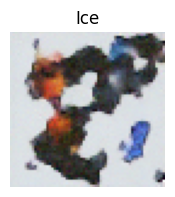

127/127 ━━━━━━━━━━━━━━━━━━━━ 103s 814ms/step - loss: 0.0489
Epoch 161/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 323ms/step - loss: 0.0762
Epoch 162/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 326ms/step - loss: 0.0490
Epoch 163/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 327ms/step - loss: 0.0390
Epoch 164/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 328ms/step - loss: 0.0650
Epoch 165/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 328ms/step - loss: 0.0601
Epoch 166/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 327ms/step - loss: 0.0504
Epoch 167/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 328ms/step - loss: 0.0536
Epoch 168/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step - loss: 0.0450
Epoch 169/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - loss: 0.0522
Epoch 170/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 0.0397
Epoch 171/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 0.0446
Epoch 172/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 333ms/step - loss: 0.0476
Epoch 173/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 42s 331ms/step - loss

Sampling sprite: 1000it [00:55, 18.18it/s]                        


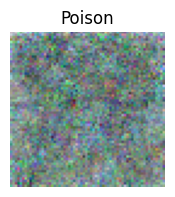

127/127 ━━━━━━━━━━━━━━━━━━━━ 96s 762ms/step - loss: 0.0923
Epoch 181/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0557
Epoch 182/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0613
Epoch 183/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0513
Epoch 184/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0371
Epoch 185/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0349
Epoch 186/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0454
Epoch 187/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0620
Epoch 188/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0441
Epoch 189/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0647
Epoch 190/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0557
Epoch 191/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0472
Epoch 192/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0363
Epoch 193/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss:

Sampling sprite: 1000it [00:53, 18.66it/s]                        


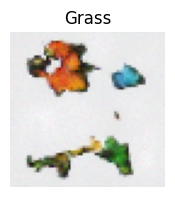

127/127 ━━━━━━━━━━━━━━━━━━━━ 95s 749ms/step - loss: 0.0356
Epoch 201/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0435
Epoch 202/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0712
Epoch 203/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0555
Epoch 204/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0367
Epoch 205/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0447
Epoch 206/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0641
Epoch 207/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0507
Epoch 208/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0483
Epoch 209/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0430
Epoch 210/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0459
Epoch 211/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0441
Epoch 212/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0625
Epoch 213/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss:

Sampling sprite: 1000it [00:53, 18.67it/s]                        


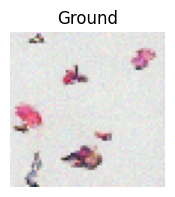

127/127 ━━━━━━━━━━━━━━━━━━━━ 95s 749ms/step - loss: 0.0676
Epoch 221/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0674
Epoch 222/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0482
Epoch 223/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0614
Epoch 224/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0378
Epoch 225/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0539
Epoch 226/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0526
Epoch 227/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0413
Epoch 228/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0462
Epoch 229/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0536
Epoch 230/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0533
Epoch 231/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0480
Epoch 232/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0450
Epoch 233/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss:

Sampling sprite: 1000it [00:53, 18.60it/s]                        


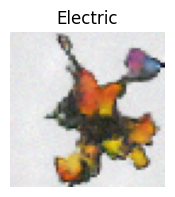

127/127 ━━━━━━━━━━━━━━━━━━━━ 95s 751ms/step - loss: 0.0412
Epoch 241/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0507
Epoch 242/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0379
Epoch 243/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0428
Epoch 244/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0486
Epoch 245/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0413
Epoch 246/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0606
Epoch 247/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0493
Epoch 248/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0456
Epoch 249/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0602
Epoch 250/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0654
Epoch 251/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0579
Epoch 252/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0458
Epoch 253/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss:

Sampling sprite: 1000it [00:53, 18.55it/s]                        


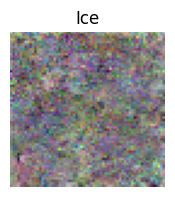

127/127 ━━━━━━━━━━━━━━━━━━━━ 95s 752ms/step - loss: 0.0565
Epoch 261/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0568
Epoch 262/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0531
Epoch 263/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0332
Epoch 264/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0532
Epoch 265/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0433
Epoch 266/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0493
Epoch 267/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0524
Epoch 268/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0586
Epoch 269/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0565
Epoch 270/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0566
Epoch 271/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0419
Epoch 272/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0576
Epoch 273/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss:

Sampling sprite: 1000it [00:54, 18.23it/s]                        


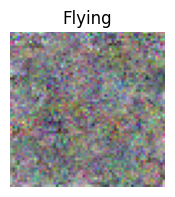

127/127 ━━━━━━━━━━━━━━━━━━━━ 96s 759ms/step - loss: 0.0415
Epoch 281/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 317ms/step - loss: 0.0425
Epoch 282/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 318ms/step - loss: 0.0508
Epoch 283/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0644
Epoch 284/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0362
Epoch 285/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0465
Epoch 286/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0507
Epoch 287/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 322ms/step - loss: 0.0415
Epoch 288/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0617
Epoch 289/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0405
Epoch 290/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0509
Epoch 291/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0365
Epoch 292/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 314ms/step - loss: 0.0496
Epoch 293/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss:

Sampling sprite: 1000it [00:54, 18.46it/s]                        


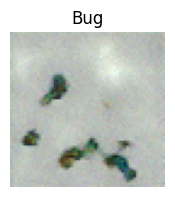

127/127 ━━━━━━━━━━━━━━━━━━━━ 95s 754ms/step - loss: 0.0659
Epoch 301/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0658
Epoch 302/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0545
Epoch 303/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0475
Epoch 304/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0390
Epoch 305/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0446
Epoch 306/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0413
Epoch 307/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0718
Epoch 308/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0413
Epoch 309/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0355
Epoch 310/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0426
Epoch 311/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0351
Epoch 312/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0622
Epoch 313/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss:

Sampling sprite: 1000it [00:55, 18.17it/s]                        


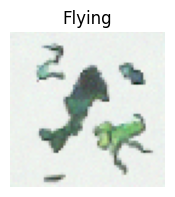

127/127 ━━━━━━━━━━━━━━━━━━━━ 96s 761ms/step - loss: 0.0454
Epoch 321/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0471
Epoch 322/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0535
Epoch 323/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0393
Epoch 324/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0474
Epoch 325/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0462
Epoch 326/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0610
Epoch 327/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0388
Epoch 328/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0632
Epoch 329/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0476
Epoch 330/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0565
Epoch 331/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0472
Epoch 332/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0427
Epoch 333/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss:

Sampling sprite: 1000it [00:54, 18.37it/s]                        


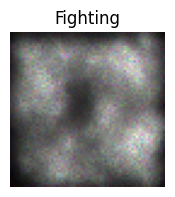

127/127 ━━━━━━━━━━━━━━━━━━━━ 96s 756ms/step - loss: 0.0417
Epoch 341/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 319ms/step - loss: 0.0500
Epoch 342/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0373
Epoch 343/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0563
Epoch 344/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0399
Epoch 345/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0474
Epoch 346/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0504
Epoch 347/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0366
Epoch 348/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0484
Epoch 349/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0582
Epoch 350/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0251
Epoch 351/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0550
Epoch 352/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0490
Epoch 353/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss:

Sampling sprite: 1000it [00:54, 18.24it/s]                        


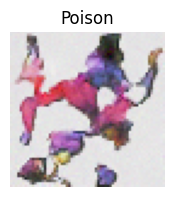

127/127 ━━━━━━━━━━━━━━━━━━━━ 96s 759ms/step - loss: 0.0477
Epoch 361/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0462
Epoch 362/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0362
Epoch 363/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0295
Epoch 364/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0400
Epoch 365/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 321ms/step - loss: 0.0416
Epoch 366/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0582
Epoch 367/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0373
Epoch 368/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0419
Epoch 369/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0416
Epoch 370/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0438
Epoch 371/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0373
Epoch 372/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0386
Epoch 373/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss:

Sampling sprite: 1000it [00:56, 17.85it/s]                        


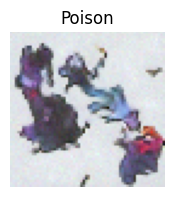

127/127 ━━━━━━━━━━━━━━━━━━━━ 97s 769ms/step - loss: 0.0400
Epoch 381/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0422
Epoch 382/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0485
Epoch 383/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 41s 320ms/step - loss: 0.0520
Epoch 384/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 50s 394ms/step - loss: 0.0675
Epoch 385/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 63s 497ms/step - loss: 0.0557
Epoch 386/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 49s 384ms/step - loss: 0.0535
Epoch 387/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0490
Epoch 388/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0433
Epoch 389/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0488
Epoch 390/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0318
Epoch 391/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0491
Epoch 392/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0385
Epoch 393/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss:

Sampling sprite: 1000it [00:53, 18.53it/s]                        


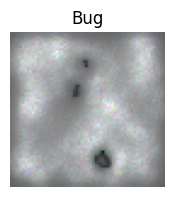

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 743ms/step - loss: 0.0471
Epoch 401/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0491
Epoch 402/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0435
Epoch 403/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0457
Epoch 404/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0288
Epoch 405/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0422
Epoch 406/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0337
Epoch 407/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0516
Epoch 408/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0360
Epoch 409/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0393
Epoch 410/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0394
Epoch 411/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0442
Epoch 412/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 310ms/step - loss: 0.0618
Epoch 413/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss:

Sampling sprite: 1000it [00:53, 18.71it/s]                        


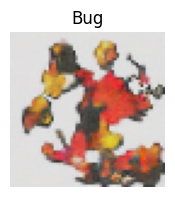

127/127 ━━━━━━━━━━━━━━━━━━━━ 93s 738ms/step - loss: 0.0382
Epoch 421/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0494
Epoch 422/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0417
Epoch 423/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0336
Epoch 424/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0349
Epoch 425/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0431
Epoch 426/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0479
Epoch 427/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0646
Epoch 428/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0394
Epoch 429/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0380
Epoch 430/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0355
Epoch 431/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0385
Epoch 432/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0375
Epoch 433/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.68it/s]                        


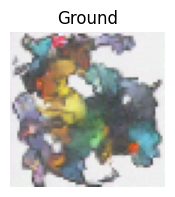

127/127 ━━━━━━━━━━━━━━━━━━━━ 93s 739ms/step - loss: 0.0543
Epoch 441/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0584
Epoch 442/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0499
Epoch 443/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0543
Epoch 444/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0478
Epoch 445/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0488
Epoch 446/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0376
Epoch 447/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0358
Epoch 448/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0373
Epoch 449/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0354
Epoch 450/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0388
Epoch 451/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0367
Epoch 452/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0550
Epoch 453/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.64it/s]                        


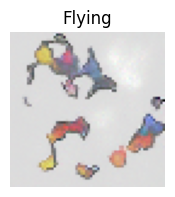

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 740ms/step - loss: 0.0336
Epoch 461/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0569
Epoch 462/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0483
Epoch 463/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0454
Epoch 464/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0531
Epoch 465/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0553
Epoch 466/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0462
Epoch 467/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0454
Epoch 468/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0410
Epoch 469/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0369
Epoch 470/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0509
Epoch 471/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0505
Epoch 472/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0460
Epoch 473/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.86it/s]                        


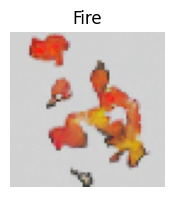

127/127 ━━━━━━━━━━━━━━━━━━━━ 93s 734ms/step - loss: 0.0327
Epoch 481/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0388
Epoch 482/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0378
Epoch 483/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0411
Epoch 484/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0443
Epoch 485/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0516
Epoch 486/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0480
Epoch 487/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0439
Epoch 488/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0317
Epoch 489/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0453
Epoch 490/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0341
Epoch 491/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0413
Epoch 492/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0419
Epoch 493/500
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:52, 18.92it/s]                        


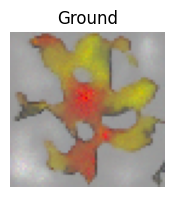

127/127 ━━━━━━━━━━━━━━━━━━━━ 93s 733ms/step - loss: 0.0530


In [6]:
# tf.config.run_functions_eagerly(True)  # to debug the model
model.fit(poke_dataset, epochs=EPOCHS, callbacks=[DiffusionCallback(model, 20)])

Epoch 1/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0409
Epoch 2/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0394
Epoch 3/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0323
Epoch 4/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0291
Epoch 5/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0378
Epoch 6/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0460
Epoch 7/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0430
Epoch 8/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0366
Epoch 9/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0383
Epoch 10/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0350
Epoch 11/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0380
Epoch 12/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0437
Epoch 13/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0552
Epoch 14/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0399
E

Sampling sprite: 1000it [00:54, 18.50it/s]                        


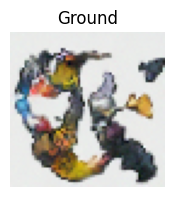

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 743ms/step - loss: 0.0413
Epoch 21/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0605
Epoch 22/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0487
Epoch 23/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0561
Epoch 24/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0473
Epoch 25/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0357
Epoch 26/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0366
Epoch 27/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0467
Epoch 28/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0429
Epoch 29/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0570
Epoch 30/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0363
Epoch 31/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0317
Epoch 32/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0359
Epoch 33/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0461
Epoch

Sampling sprite: 1000it [00:53, 18.61it/s]                        


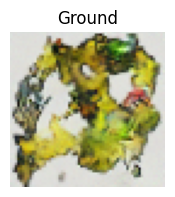

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 740ms/step - loss: 0.0525
Epoch 41/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0499
Epoch 42/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0362
Epoch 43/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 315ms/step - loss: 0.0402
Epoch 44/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0448
Epoch 45/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0809
Epoch 46/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0511
Epoch 47/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0610
Epoch 48/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0449
Epoch 49/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0502
Epoch 50/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0396
Epoch 51/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0443
Epoch 52/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0404
Epoch 53/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0441
Epoch

Sampling sprite: 1000it [00:53, 18.58it/s]                        


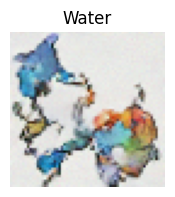

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 741ms/step - loss: 0.0360
Epoch 61/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0342
Epoch 62/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0452
Epoch 63/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0438
Epoch 64/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0380
Epoch 65/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0382
Epoch 66/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0421
Epoch 67/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0260
Epoch 68/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0409
Epoch 69/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0475
Epoch 70/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0470
Epoch 71/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0386
Epoch 72/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0448
Epoch 73/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0380
Epoch

Sampling sprite: 1000it [00:53, 18.58it/s]                        


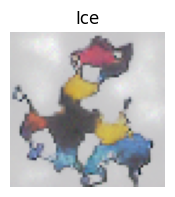

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 741ms/step - loss: 0.0395
Epoch 81/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0339
Epoch 82/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0435
Epoch 83/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0507
Epoch 84/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0683
Epoch 85/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0437
Epoch 86/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0387
Epoch 87/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0415
Epoch 88/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0456
Epoch 89/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0437
Epoch 90/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0453
Epoch 91/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0395
Epoch 92/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0367
Epoch 93/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0342
Epoch

Sampling sprite: 1000it [00:54, 18.38it/s]                        


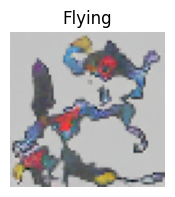

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 745ms/step - loss: 0.0360
Epoch 101/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0341
Epoch 102/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0676
Epoch 103/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0436
Epoch 104/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0343
Epoch 105/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0427
Epoch 106/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0355
Epoch 107/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0547
Epoch 108/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0458
Epoch 109/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0404
Epoch 110/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0380
Epoch 111/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0411
Epoch 112/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0250
Epoch 113/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.56it/s]                        


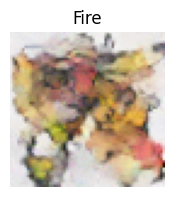

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 741ms/step - loss: 0.0345
Epoch 121/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0534
Epoch 122/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0366
Epoch 123/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0422
Epoch 124/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0384
Epoch 125/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0497
Epoch 126/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0421
Epoch 127/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0345
Epoch 128/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0339
Epoch 129/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0341
Epoch 130/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0387
Epoch 131/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0407
Epoch 132/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0639
Epoch 133/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.57it/s]                        


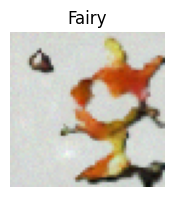

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 741ms/step - loss: 0.0442
Epoch 141/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0440
Epoch 142/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0388
Epoch 143/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0379
Epoch 144/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0379
Epoch 145/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0471
Epoch 146/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0586
Epoch 147/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0578
Epoch 148/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0491
Epoch 149/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0344
Epoch 150/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0317
Epoch 151/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0394
Epoch 152/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0278
Epoch 153/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:54, 18.51it/s]                        


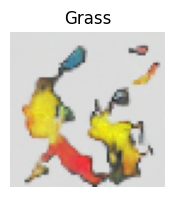

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 742ms/step - loss: 0.0312
Epoch 161/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0355
Epoch 162/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0385
Epoch 163/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0502
Epoch 164/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0426
Epoch 165/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0403
Epoch 166/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0373
Epoch 167/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0502
Epoch 168/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0809
Epoch 169/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0520
Epoch 170/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0578
Epoch 171/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0384
Epoch 172/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0434
Epoch 173/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 312ms/step - loss:

Sampling sprite: 1000it [00:53, 18.65it/s]                        


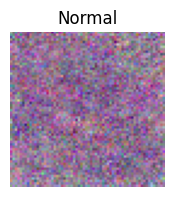

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 740ms/step - loss: 0.0579
Epoch 181/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0454
Epoch 182/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0514
Epoch 183/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0510
Epoch 184/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0285
Epoch 185/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0423
Epoch 186/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0388
Epoch 187/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0424
Epoch 188/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0304
Epoch 189/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0537
Epoch 190/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0436
Epoch 191/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0281
Epoch 192/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0409
Epoch 193/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss:

Sampling sprite: 1000it [00:54, 18.38it/s]                        


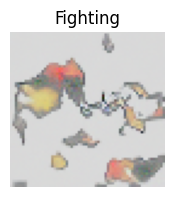

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 746ms/step - loss: 0.0278
Epoch 201/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0332
Epoch 202/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0331
Epoch 203/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0356
Epoch 204/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0407
Epoch 205/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0478
Epoch 206/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0389
Epoch 207/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0363
Epoch 208/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0442
Epoch 209/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0608
Epoch 210/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0329
Epoch 211/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0403
Epoch 212/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0333
Epoch 213/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.59it/s]                        


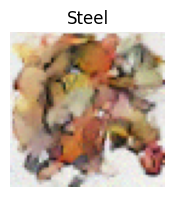

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 740ms/step - loss: 0.0356
Epoch 221/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0324
Epoch 222/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0391
Epoch 223/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0368
Epoch 224/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0484
Epoch 225/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0451
Epoch 226/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0436
Epoch 227/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0372
Epoch 228/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0422
Epoch 229/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0269
Epoch 230/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0371
Epoch 231/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0471
Epoch 232/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0365
Epoch 233/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.67it/s]                        


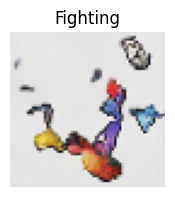

127/127 ━━━━━━━━━━━━━━━━━━━━ 93s 739ms/step - loss: 0.0368
Epoch 241/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0444
Epoch 242/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0410
Epoch 243/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0245
Epoch 244/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0442
Epoch 245/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0447
Epoch 246/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0543
Epoch 247/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0667
Epoch 248/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0388
Epoch 249/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0440
Epoch 250/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0463
Epoch 251/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0376
Epoch 252/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0323
Epoch 253/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.59it/s]                        


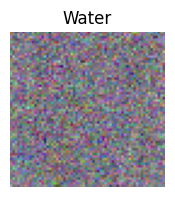

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 740ms/step - loss: 0.0340
Epoch 261/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0518
Epoch 262/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0347
Epoch 263/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0379
Epoch 264/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0421
Epoch 265/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0459
Epoch 266/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0394
Epoch 267/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0454
Epoch 268/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0367
Epoch 269/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0632
Epoch 270/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0450
Epoch 271/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0335
Epoch 272/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0377
Epoch 273/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:54, 18.49it/s]                        


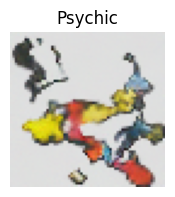

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 743ms/step - loss: 0.0361
Epoch 281/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0416
Epoch 282/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0314
Epoch 283/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0296
Epoch 284/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0329
Epoch 285/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0429
Epoch 286/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0401
Epoch 287/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0447
Epoch 288/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0298
Epoch 289/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0599
Epoch 290/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0402
Epoch 291/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0352
Epoch 292/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0254
Epoch 293/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:54, 18.49it/s]                        


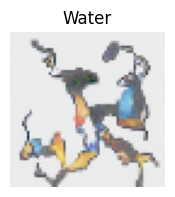

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 742ms/step - loss: 0.0289
Epoch 301/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0515
Epoch 302/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0398
Epoch 303/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0516
Epoch 304/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0305
Epoch 305/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0325
Epoch 306/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0447
Epoch 307/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0402
Epoch 308/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0401
Epoch 309/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0384
Epoch 310/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0416
Epoch 311/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0358
Epoch 312/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0538
Epoch 313/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:54, 18.46it/s]                        


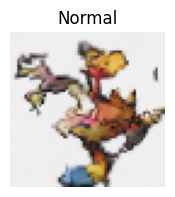

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 744ms/step - loss: 0.0398
Epoch 321/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0628
Epoch 322/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0505
Epoch 323/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0458
Epoch 324/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0511
Epoch 325/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0394
Epoch 326/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0479
Epoch 327/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0342
Epoch 328/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0254
Epoch 329/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0441
Epoch 330/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0480
Epoch 331/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0434
Epoch 332/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0487
Epoch 333/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.61it/s]                        


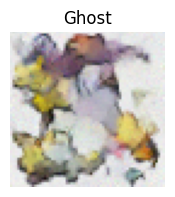

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 740ms/step - loss: 0.0454
Epoch 341/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0410
Epoch 342/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0339
Epoch 343/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0436
Epoch 344/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0437
Epoch 345/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0501
Epoch 346/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0410
Epoch 347/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0434
Epoch 348/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0513
Epoch 349/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0404
Epoch 350/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0399
Epoch 351/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0423
Epoch 352/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0374
Epoch 353/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.79it/s]                        


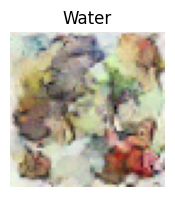

127/127 ━━━━━━━━━━━━━━━━━━━━ 93s 736ms/step - loss: 0.0342
Epoch 361/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0577
Epoch 362/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0452
Epoch 363/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0408
Epoch 364/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0343
Epoch 365/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0468
Epoch 366/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0301
Epoch 367/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0455
Epoch 368/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0382
Epoch 369/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0328
Epoch 370/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0397
Epoch 371/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0491
Epoch 372/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0479
Epoch 373/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.72it/s]                        


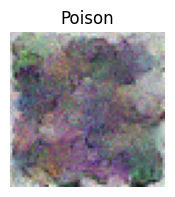

127/127 ━━━━━━━━━━━━━━━━━━━━ 93s 738ms/step - loss: 0.0355
Epoch 381/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0399
Epoch 382/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0383
Epoch 383/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0454
Epoch 384/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0457
Epoch 385/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0354
Epoch 386/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0383
Epoch 387/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0403
Epoch 388/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0401
Epoch 389/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0401
Epoch 390/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0397
Epoch 391/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0497
Epoch 392/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0390
Epoch 393/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:54, 18.36it/s]                        


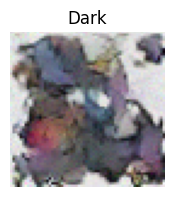

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 746ms/step - loss: 0.0381
Epoch 401/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0407
Epoch 402/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0394
Epoch 403/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0308
Epoch 404/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0421
Epoch 405/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0459
Epoch 406/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0455
Epoch 407/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0414
Epoch 408/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0376
Epoch 409/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0384
Epoch 410/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0305
Epoch 411/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0345
Epoch 412/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0291
Epoch 413/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.59it/s]                        


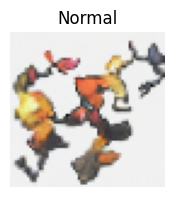

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 741ms/step - loss: 0.0328
Epoch 421/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0338
Epoch 422/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0397
Epoch 423/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0412
Epoch 424/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0401
Epoch 425/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0352
Epoch 426/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0404
Epoch 427/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0345
Epoch 428/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0427
Epoch 429/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0282
Epoch 430/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0357
Epoch 431/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0373
Epoch 432/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0320
Epoch 433/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.61it/s]                        


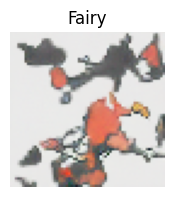

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 740ms/step - loss: 0.0427
Epoch 441/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0417
Epoch 442/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0414
Epoch 443/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0308
Epoch 444/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0467
Epoch 445/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0609
Epoch 446/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0381
Epoch 447/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0383
Epoch 448/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0489
Epoch 449/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0354
Epoch 450/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0367
Epoch 451/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0548
Epoch 452/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0333
Epoch 453/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.60it/s]                        


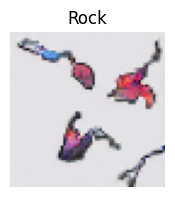

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 740ms/step - loss: 0.0482
Epoch 461/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0509
Epoch 462/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0416
Epoch 463/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0557
Epoch 464/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0404
Epoch 465/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0323
Epoch 466/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0325
Epoch 467/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0449
Epoch 468/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0462
Epoch 469/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0344
Epoch 470/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0398
Epoch 471/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0398
Epoch 472/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0313
Epoch 473/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.60it/s]                        


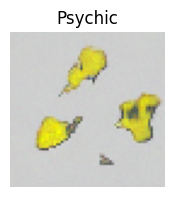

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 740ms/step - loss: 0.0409
Epoch 481/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0476
Epoch 482/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0573
Epoch 483/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0476
Epoch 484/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0355
Epoch 485/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0503
Epoch 486/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0348
Epoch 487/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0361
Epoch 488/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0434
Epoch 489/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0407
Epoch 490/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0361
Epoch 491/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0391
Epoch 492/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0341
Epoch 493/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:54, 18.26it/s]                        


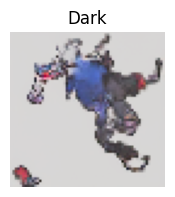

127/127 ━━━━━━━━━━━━━━━━━━━━ 95s 749ms/step - loss: 0.0359
Epoch 501/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0351
Epoch 502/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0497
Epoch 503/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0446
Epoch 504/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0398
Epoch 505/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0394
Epoch 506/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0372
Epoch 507/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0332
Epoch 508/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0452
Epoch 509/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0383
Epoch 510/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0383
Epoch 511/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0479
Epoch 512/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0419
Epoch 513/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss:

Sampling sprite: 1000it [00:53, 18.53it/s]                        


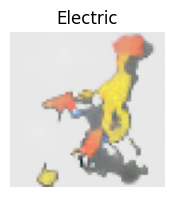

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 742ms/step - loss: 0.0380
Epoch 521/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0350
Epoch 522/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0388
Epoch 523/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0329
Epoch 524/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0432
Epoch 525/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0431
Epoch 526/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0341
Epoch 527/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0312
Epoch 528/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0341
Epoch 529/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0313
Epoch 530/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0383
Epoch 531/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0457
Epoch 532/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0393
Epoch 533/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.64it/s]                        


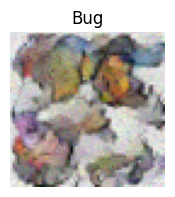

127/127 ━━━━━━━━━━━━━━━━━━━━ 94s 740ms/step - loss: 0.0389
Epoch 541/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0403
Epoch 542/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0402
Epoch 543/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 310ms/step - loss: 0.0482
Epoch 544/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0414
Epoch 545/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0363
Epoch 546/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0319
Epoch 547/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0385
Epoch 548/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0317
Epoch 549/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0314
Epoch 550/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0321
Epoch 551/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0380
Epoch 552/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0410
Epoch 553/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss:

Sampling sprite: 1000it [00:56, 17.60it/s]                        


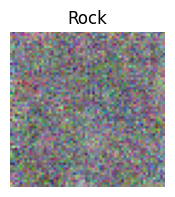

127/127 ━━━━━━━━━━━━━━━━━━━━ 97s 766ms/step - loss: 0.0385
Epoch 561/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0491
Epoch 562/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0403
Epoch 563/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0438
Epoch 564/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0345
Epoch 565/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0437
Epoch 566/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0531
Epoch 567/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0376
Epoch 568/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0490
Epoch 569/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 40s 311ms/step - loss: 0.0378
Epoch 570/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0508
Epoch 571/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0441
Epoch 572/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0499
Epoch 573/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.82it/s]                        


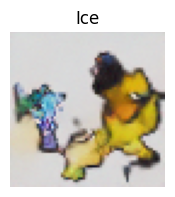

127/127 ━━━━━━━━━━━━━━━━━━━━ 93s 735ms/step - loss: 0.0435
Epoch 581/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 308ms/step - loss: 0.0349
Epoch 582/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0341
Epoch 583/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 309ms/step - loss: 0.0287
Epoch 584/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0390
Epoch 585/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0301
Epoch 586/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0304
Epoch 587/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0348
Epoch 588/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0386
Epoch 589/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0346
Epoch 590/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0463
Epoch 591/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0346
Epoch 592/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss: 0.0455
Epoch 593/600
127/127 ━━━━━━━━━━━━━━━━━━━━ 39s 310ms/step - loss:

Sampling sprite: 1000it [00:53, 18.64it/s]                        


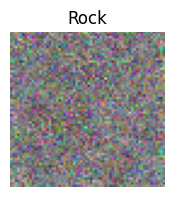

127/127 ━━━━━━━━━━━━━━━━━━━━ 93s 739ms/step - loss: 0.0503


In [7]:
# tf.config.run_functions_eagerly(True)  # to debug the model
model.fit(poke_dataset, epochs=600, callbacks=[DiffusionCallback(model, 20)])

Generating sample 1/3


Sampling sprite: 1000it [00:52, 18.98it/s]                        


Generating sample 2/3


Sampling sprite: 1000it [00:51, 19.30it/s]                        


Generating sample 3/3


Sampling sprite: 1000it [00:51, 19.24it/s]                        


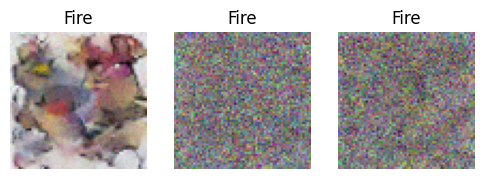

Generating sample 1/3


Sampling sprite: 1000it [00:52, 19.04it/s]                        


Generating sample 2/3


Sampling sprite: 1000it [00:52, 18.99it/s]                        


Generating sample 3/3


Sampling sprite: 1000it [00:54, 18.39it/s]                        


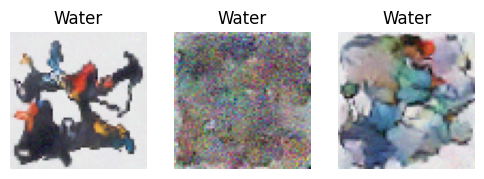

Generating sample 1/3


Sampling sprite: 1000it [00:55, 18.10it/s]                        


Generating sample 2/3


Sampling sprite: 1000it [00:53, 18.66it/s]                        


Generating sample 3/3


Sampling sprite: 1000it [00:53, 18.69it/s]                        


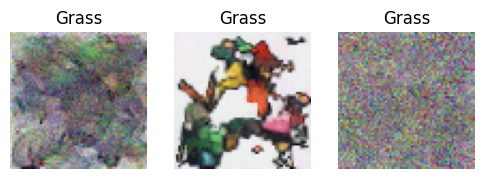

Generating sample 1/3


Sampling sprite: 1000it [00:54, 18.46it/s]                        


Generating sample 2/3


Sampling sprite: 1000it [00:53, 18.73it/s]                        


Generating sample 3/3


Sampling sprite: 1000it [00:53, 18.74it/s]                        


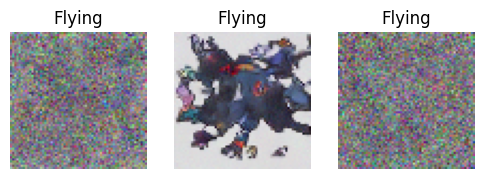

In [8]:
model.plot_samples(3, "Fire")
model.plot_samples(3, "Water")
model.plot_samples(3, "Grass")
model.plot_samples(3, "Flying")

### 2.2. Save Model

Finalmente, se guardan los resultados finales del modelo de difusión en un fichero `.h5` para su posterior uso y visualización. TODO: MIRAR OTROS FORMATOS DE GUARDADO

TODO: INVESTIGAR OTROS FORMATOS DE GUARDADO (HDF5, PICKLE, ETC.)

In [9]:
# Save the model function
# =====================================================================
def save_model(model: tf.keras.models.Model, model_name: str) -> None:
    """Saves the model

    :param model: The model to save
    :param model_name: The name of the model
    :return: None
    """

    # Save the model
    model_dir = "../../models/"
    os.makedirs(model_dir, exist_ok=True)
    if not os.path.exists(os.path.join(model_dir, f"{model_name}.h5")):
        model.save(os.path.join(model_dir, f"{model_name}.keras"))
        print(f"Model {model_name}, saved successfully!")
    else:
        print(f"Model {model_name}, already exists!")

In [10]:
# Save the model
SCHEDULER = "linear"
EPOCHS = 1100
model_name = f"diffusion_{IMG_SIZE}_{BATCH_SIZE}_{EPOCHS}_{T}_{SCHEDULER}_ddpm_attention_time_sin"

save_model(model, model_name)

/home/pqlza/.local/lib/python3.11/site-packages/keras/src/saving/saving_api.py:100: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  saving_lib.save_model(model, filepath)


Model diffusion_64_32_1100_1000_linear_ddpm_attention_time_sin, saved successfully!


In [11]:
# # load the model
# # =====================================================================
# model_loaded = tf.keras.models.load_model(f"../../models/{model_name}.keras")

# model_load.plot_samples(6)

[BACK TO TOP](#test)

# Test 2

In [1]:
# Import necessary libraries
# =====================================================================
import os

# Configurar el nivel de logging para mostrar solo errores
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import configparser
import tensorflow as tf
import pandas as pd

# Import src code
from src.model.model_build import *
from src.utils.utils import PROJECT_DIR, DATA_PATH
from src.visualization import visualize
from src.model.overfitting_test import *
from src.data.create_dataset import dataset_tf
from src.data.path_loader import PathLoader

In [2]:
# Use the GPU
# =====================================================================
gpus_list = tf.config.list_physical_devices("GPU")
gpu = gpus_list[0]
tf.config.experimental.set_memory_growth(gpu, True)

print("GPUs Available: ", gpus_list)

GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
# Set config file
# =====================================================================
config = configparser.ConfigParser()
config.read(PROJECT_DIR / "config.ini")

# Hyperparameters
config_hp = config["hyperparameters"]

IMG_SIZE = 32
NUM_CLASSES = int(config_hp["num_classes"])
BATCH_SIZE = 64
EPOCHS = 500
T = 1000
BETA_START = float(config_hp["beta_start"])
BETA_END = float(config_hp["beta_end"])
s = float(config_hp["s"])  # scale factor for the variance curve
SCHEDULER = config_hp["scheduler"]

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # TODO: ADD TO CONFIG FILE
loss_fn = tf.keras.losses.MeanSquaredError()

## 1. Dataset

- The shape of the dataset is: (64, 32, 32, 3) => batch_size: 64, height: 32, width: 32, channels: 3
- The shape of the dataset labels is: (64, 18) => batch_size: 64, number of labels: 18


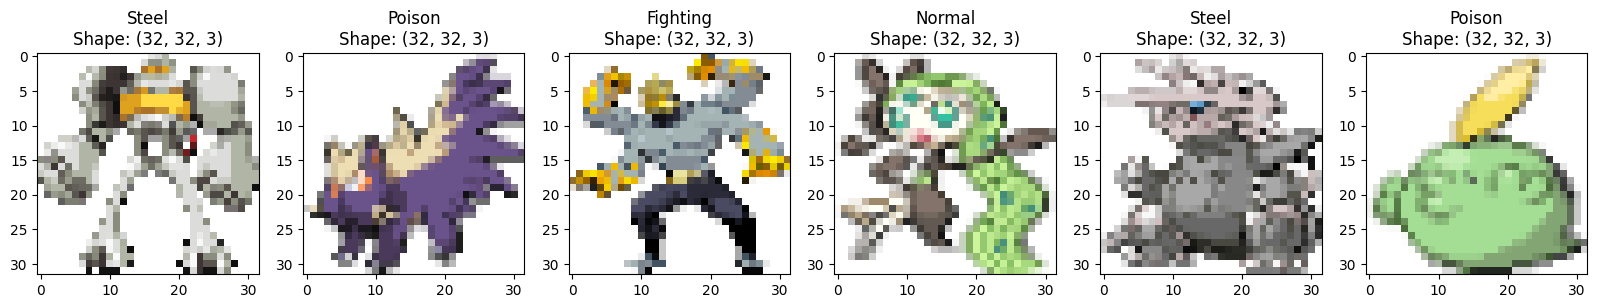

In [4]:
# Load csv data
# =====================================================================
path = f"{DATA_PATH}/processed/pokedex_cleaned.csv"
df = pd.read_csv(path)

dataset_path = f"{DATA_PATH}/processed/pokemon_tf_dataset"
# poke_dataset = tf.data.Dataset.load(path=dataset_path, compression="GZIP")

poke_dataset = dataset_tf(
    image_paths=PathLoader.get_image_paths(f"{DATA_PATH}/interim/image_paths.json"),
    df=df,
    img_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    save=False,
    save_path=dataset_path,
)

# Check the dataset
# =====================================================================
for img, label in poke_dataset.take(1):
    print(
        f"- The shape of the dataset is: {img.shape} => batch_size: {img.shape[0]}, height: {img.shape[1]}, width: {img.shape[2]}, channels: {img.shape[3]}"
    )
    print(
        f"- The shape of the dataset labels is: {label.shape} => batch_size: {label.shape[0]}, number of labels: {label.shape[1]}"
    )

# Visualize the dataset
visualize.plot_images_batch(dataset_tf=poke_dataset, n=6)

## 2. Model

In [5]:
# Create the model
# =====================================================================
u_net = build_unet(IMG_SIZE, NUM_CLASSES, num_channels=128, embedding_dim=128)
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model = DiffusionModel(
    u_net, IMG_SIZE, NUM_CLASSES, T, BETA_START, BETA_END, s, "linear"
)

# Compile the model
# =====================================================================
model.compile(loss=loss_fn, optimizer=optimizer)

### 2.1. Training

Epoch 1/500


I0000 00:00:1715321400.504626  153754 service.cc:145] XLA service 0x757610001de0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1715321400.504659  153754 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Laptop GPU, Compute Capability 8.6
W0000 00:00:1715321401.076716  153754 random_ops.cc:105] Warning: Using tf.random.uniform with XLA compilation will ignore seeds; consider using tf.random.stateless_uniform instead if reproducible behavior is desired. random_uniform
I0000 00:00:1715321402.601594  153891 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3222', 192 bytes spill stores, 192 bytes spill loads

I0000 00:00:1715321402.809311  153893 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_3222', 308 bytes spill stores, 308 bytes spill loads

I0000 00:00:1715321404.569046  153890 asm_compiler.cc:369] ptxas

63/63 ━━━━━━━━━━━━━━━━━━━━ 46s 205ms/step - loss: 0.8872
Epoch 2/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.2833
Epoch 3/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1745
Epoch 4/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1950
Epoch 5/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1719
Epoch 6/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.1614
Epoch 7/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1740
Epoch 8/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1712
Epoch 9/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1756
Epoch 10/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1835
Epoch 11/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1782
Epoch 12/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1410
Epoch 13/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1112
Epoch 14/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1520
Epoch 15/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 1

Sampling sprite: 1000it [00:58, 17.21it/s]                        


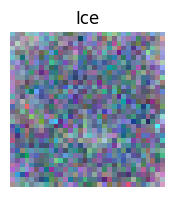

63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - loss: 0.1949  
Epoch 21/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.1298
Epoch 22/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1520
Epoch 23/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1619
Epoch 24/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1377
Epoch 25/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0881
Epoch 26/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0971
Epoch 27/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1148
Epoch 28/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0980
Epoch 29/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1148
Epoch 30/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1090
Epoch 31/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1211
Epoch 32/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0952
Epoch 33/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1044
Epoch 34/500
63/63 ━━━━━━━━━━━━━━━

Sampling sprite: 1000it [00:55, 17.91it/s]                        


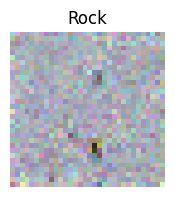

63/63 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - loss: 0.1071  
Epoch 41/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1083
Epoch 42/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1020
Epoch 43/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1142
Epoch 44/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1513
Epoch 45/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1262
Epoch 46/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1391
Epoch 47/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1389
Epoch 48/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1998
Epoch 49/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1133
Epoch 50/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - loss: 0.0848
Epoch 51/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - loss: 0.0849
Epoch 52/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - loss: 0.1201
Epoch 53/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 207ms/step - loss: 0.1266
Epoch 54/500
63/63 ━━━━━━━━━━━━━━━

Sampling sprite: 1000it [00:56, 17.81it/s]                        


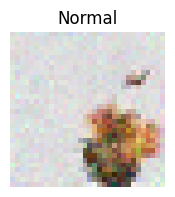

63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - loss: 0.0713  
Epoch 61/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1143
Epoch 62/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1282
Epoch 63/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1518
Epoch 64/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1150
Epoch 65/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1020
Epoch 66/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1313
Epoch 67/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1237
Epoch 68/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0926
Epoch 69/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0959
Epoch 70/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0725
Epoch 71/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1260
Epoch 72/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1157
Epoch 73/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1231
Epoch 74/500
63/63 ━━━━━━━━━━━━━━━

Sampling sprite: 1000it [00:56, 17.60it/s]                        


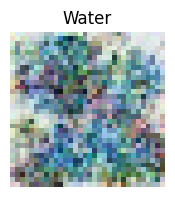

63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - loss: 0.0724  
Epoch 81/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0578
Epoch 82/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1151
Epoch 83/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1118
Epoch 84/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1017
Epoch 85/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1037
Epoch 86/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0832
Epoch 87/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0872
Epoch 88/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0594
Epoch 89/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0507
Epoch 90/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0990
Epoch 91/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0829
Epoch 92/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1155
Epoch 93/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0669
Epoch 94/500
63/63 ━━━━━━━━━━━━━━━

Sampling sprite: 1000it [00:56, 17.57it/s]                        


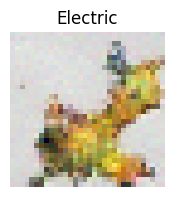

63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - loss: 0.1141  
Epoch 101/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0863
Epoch 102/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0737
Epoch 103/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0916
Epoch 104/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1118
Epoch 105/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1206
Epoch 106/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0991
Epoch 107/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0797
Epoch 108/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0702
Epoch 109/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1204
Epoch 110/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0932
Epoch 111/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0829
Epoch 112/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0687
Epoch 113/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0688
Epoch 114/500
63/63 ━

Sampling sprite: 1000it [00:57, 17.45it/s]                        


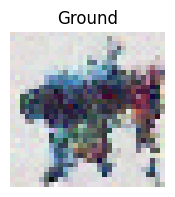

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0761  
Epoch 121/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0889
Epoch 122/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0756
Epoch 123/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0778
Epoch 124/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0653
Epoch 125/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1160
Epoch 126/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0620
Epoch 127/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0874
Epoch 128/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0779
Epoch 129/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0751
Epoch 130/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0427
Epoch 131/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0704
Epoch 132/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0549
Epoch 133/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1104
Epoch 134/500
63/63 ━

Sampling sprite: 1000it [00:57, 17.52it/s]                        


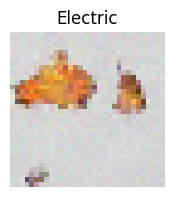

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0423  
Epoch 141/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0776
Epoch 142/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0812
Epoch 143/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0614
Epoch 144/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0889
Epoch 145/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0605
Epoch 146/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0943
Epoch 147/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0971
Epoch 148/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0834
Epoch 149/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0914
Epoch 150/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0751
Epoch 151/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0534
Epoch 152/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0789
Epoch 153/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0808
Epoch 154/500
63/63 ━

Sampling sprite: 1000it [00:57, 17.47it/s]                        


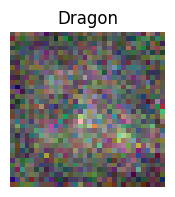

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0639  
Epoch 161/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0904
Epoch 162/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.1008
Epoch 163/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0808
Epoch 164/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0790
Epoch 165/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0592
Epoch 166/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0517
Epoch 167/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0897
Epoch 168/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0870
Epoch 169/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0903
Epoch 170/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0955
Epoch 171/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1271
Epoch 172/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1002
Epoch 173/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0820
Epoch 174/500
63/63 ━

Sampling sprite: 1000it [00:57, 17.50it/s]                        


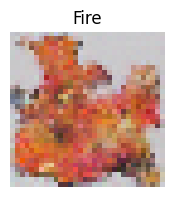

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0783  
Epoch 181/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0737
Epoch 182/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0771
Epoch 183/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0564
Epoch 184/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1089
Epoch 185/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0841
Epoch 186/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0961
Epoch 187/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0917
Epoch 188/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0625
Epoch 189/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0669
Epoch 190/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0927
Epoch 191/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1161
Epoch 192/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0541
Epoch 193/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1306
Epoch 194/500
63/63 ━

Sampling sprite: 1000it [00:57, 17.50it/s]                        


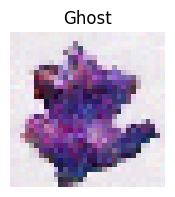

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.1100  
Epoch 201/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0713
Epoch 202/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0629
Epoch 203/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0620
Epoch 204/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0947
Epoch 205/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0732
Epoch 206/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0651
Epoch 207/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0609
Epoch 208/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0811
Epoch 209/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0949
Epoch 210/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0531
Epoch 211/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0877
Epoch 212/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0569
Epoch 213/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1105
Epoch 214/500
63/63 ━

Sampling sprite: 1000it [00:57, 17.43it/s]                        


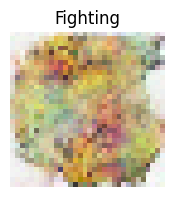

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0701  
Epoch 221/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0713
Epoch 222/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.1083
Epoch 223/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0781
Epoch 224/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0955
Epoch 225/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1190
Epoch 226/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0568
Epoch 227/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0825
Epoch 228/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0652
Epoch 229/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0680
Epoch 230/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0757
Epoch 231/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0963
Epoch 232/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0495
Epoch 233/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0634
Epoch 234/500
63/63 ━

Sampling sprite: 1000it [00:57, 17.51it/s]                        


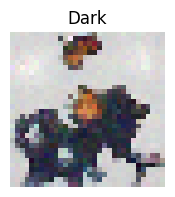

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0803  
Epoch 241/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0638
Epoch 242/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0655
Epoch 243/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0863
Epoch 244/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0576
Epoch 245/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0520
Epoch 246/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0734
Epoch 247/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0594
Epoch 248/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1198
Epoch 249/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0523
Epoch 250/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1223
Epoch 251/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0555
Epoch 252/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0498
Epoch 253/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0779
Epoch 254/500
63/63 ━

Sampling sprite: 1000it [00:57, 17.51it/s]                        


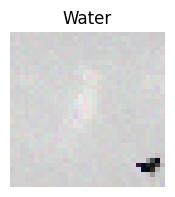

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0711  
Epoch 261/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0803
Epoch 262/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0605
Epoch 263/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0902
Epoch 264/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0660
Epoch 265/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1192
Epoch 266/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1026
Epoch 267/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0730
Epoch 268/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0895
Epoch 269/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0720
Epoch 270/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0644
Epoch 271/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0714
Epoch 272/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0687
Epoch 273/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1002
Epoch 274/500
63/63 ━

Sampling sprite: 1000it [00:56, 17.57it/s]                        


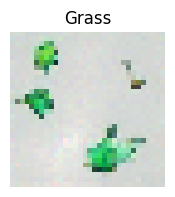

63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - loss: 0.0904  
Epoch 281/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0800
Epoch 282/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0614
Epoch 283/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0479
Epoch 284/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0514
Epoch 285/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0522
Epoch 286/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0996
Epoch 287/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0521
Epoch 288/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0609
Epoch 289/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0761
Epoch 290/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0668
Epoch 291/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0660
Epoch 292/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0460
Epoch 293/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0707
Epoch 294/500
63/63 ━

Sampling sprite: 1000it [00:57, 17.40it/s]                        


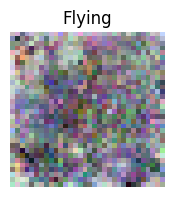

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0648  
Epoch 301/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0676
Epoch 302/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0778
Epoch 303/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0842
Epoch 304/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0759
Epoch 305/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0628
Epoch 306/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1009
Epoch 307/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0744
Epoch 308/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0693
Epoch 309/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0902
Epoch 310/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0846
Epoch 311/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0763
Epoch 312/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0949
Epoch 313/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0653
Epoch 314/500
63/63 ━

Sampling sprite: 1000it [00:57, 17.27it/s]                        


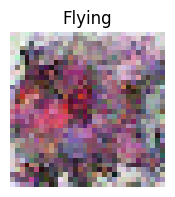

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0629  
Epoch 321/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0738
Epoch 322/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0726
Epoch 323/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0828
Epoch 324/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0871
Epoch 325/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0749
Epoch 326/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0645
Epoch 327/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0664
Epoch 328/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0668
Epoch 329/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0595
Epoch 330/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0966
Epoch 331/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0706
Epoch 332/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0590
Epoch 333/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0474
Epoch 334/500
63/63 ━

Sampling sprite: 1000it [00:57, 17.47it/s]                        


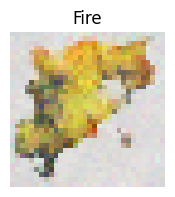

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0799  
Epoch 341/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0810
Epoch 342/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0855
Epoch 343/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0584
Epoch 344/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0755
Epoch 345/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0829
Epoch 346/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0704
Epoch 347/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0488
Epoch 348/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0668
Epoch 349/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0854
Epoch 350/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0613
Epoch 351/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0658
Epoch 352/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0715
Epoch 353/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0512
Epoch 354/500
63/63 ━

Sampling sprite: 1000it [00:57, 17.37it/s]                        


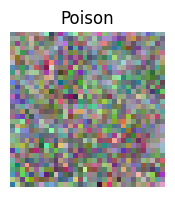

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0752  
Epoch 361/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0743
Epoch 362/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0569
Epoch 363/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0680
Epoch 364/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0608
Epoch 365/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0659
Epoch 366/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0626
Epoch 367/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0440
Epoch 368/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0822
Epoch 369/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0703
Epoch 370/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0585
Epoch 371/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1193
Epoch 372/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1050
Epoch 373/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0746
Epoch 374/500
63/63 ━

Sampling sprite: 1000it [00:57, 17.27it/s]                        


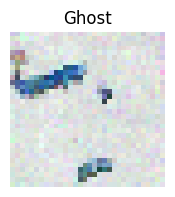

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0730  
Epoch 381/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0659
Epoch 382/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0706
Epoch 383/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1007
Epoch 384/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0855
Epoch 385/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0547
Epoch 386/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0824
Epoch 387/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0739
Epoch 388/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0841
Epoch 389/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0579
Epoch 390/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0742
Epoch 391/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0681
Epoch 392/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0812
Epoch 393/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0927
Epoch 394/500
63/63 ━

Sampling sprite: 1000it [00:57, 17.42it/s]                        


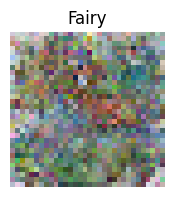

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0636  
Epoch 401/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0516
Epoch 402/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0321
Epoch 403/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0597
Epoch 404/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0600
Epoch 405/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0971
Epoch 406/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0729
Epoch 407/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0681
Epoch 408/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0868
Epoch 409/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0988
Epoch 410/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0732
Epoch 411/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0736
Epoch 412/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0625
Epoch 413/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0977
Epoch 414/500
63/63 ━

Sampling sprite: 1000it [00:58, 17.23it/s]                        


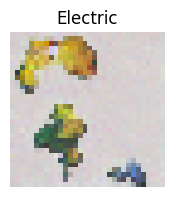

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0868  
Epoch 421/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0933
Epoch 422/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0697
Epoch 423/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0595
Epoch 424/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0813
Epoch 425/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0520
Epoch 426/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0610
Epoch 427/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0662
Epoch 428/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0601
Epoch 429/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0815
Epoch 430/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0534
Epoch 431/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0643
Epoch 432/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0691
Epoch 433/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0598
Epoch 434/500
63/63 ━

Sampling sprite: 1000it [00:58, 17.21it/s]                        


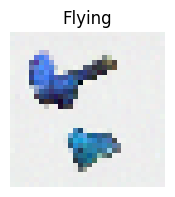

63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - loss: 0.0503  
Epoch 441/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0542
Epoch 442/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0512
Epoch 443/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0612
Epoch 444/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0542
Epoch 445/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0691
Epoch 446/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0515
Epoch 447/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0433
Epoch 448/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0619
Epoch 449/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0511
Epoch 450/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0723
Epoch 451/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0709
Epoch 452/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0725
Epoch 453/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0682
Epoch 454/500
63/63 ━

Sampling sprite: 1000it [00:56, 17.57it/s]                        


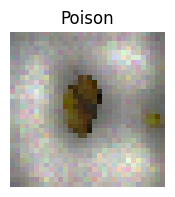

63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - loss: 0.1034  
Epoch 461/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0465
Epoch 462/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0497
Epoch 463/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0794
Epoch 464/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0887
Epoch 465/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0664
Epoch 466/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0743
Epoch 467/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0924
Epoch 468/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0659
Epoch 469/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0769
Epoch 470/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0719
Epoch 471/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0602
Epoch 472/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0748
Epoch 473/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0715
Epoch 474/500
63/63 ━

Sampling sprite: 1000it [00:57, 17.35it/s]                        


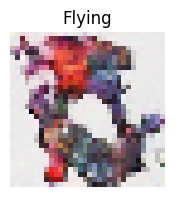

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0618  
Epoch 481/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0898
Epoch 482/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0481
Epoch 483/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0645
Epoch 484/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0720
Epoch 485/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0606
Epoch 486/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0656
Epoch 487/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0637
Epoch 488/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0314
Epoch 489/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0534
Epoch 490/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0829
Epoch 491/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0430
Epoch 492/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0568
Epoch 493/500
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0553
Epoch 494/500
63/63 ━

Sampling sprite: 1000it [00:58, 17.12it/s]                        


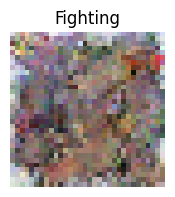

63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - loss: 0.0825  


In [6]:
# tf.config.run_functions_eagerly(True)  # to debug the model
model.fit(poke_dataset, epochs=EPOCHS, callbacks=[DiffusionCallback(model, 20)])

Epoch 1/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0729
Epoch 2/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0737
Epoch 3/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0532
Epoch 4/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0507
Epoch 5/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0603
Epoch 6/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0830
Epoch 7/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0615
Epoch 8/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0801
Epoch 9/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0793
Epoch 10/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0622
Epoch 11/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0837
Epoch 12/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0495
Epoch 13/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0812
Epoch 14/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0766
Epoch 15/1000
6

Sampling sprite: 1000it [00:57, 17.34it/s]                        


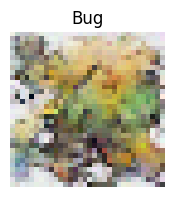

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0679  
Epoch 21/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0572
Epoch 22/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.1074
Epoch 23/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0754
Epoch 24/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0613
Epoch 25/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0528
Epoch 26/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0638
Epoch 27/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0610
Epoch 28/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0672
Epoch 29/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0634
Epoch 30/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0890
Epoch 31/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0574
Epoch 32/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0859
Epoch 33/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0587
Epoch 34/1000
63/63 ━

Sampling sprite: 1000it [00:56, 17.62it/s]                        


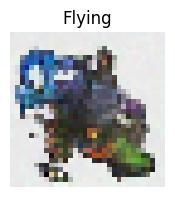

63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - loss: 0.0510  
Epoch 41/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0424
Epoch 42/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0733
Epoch 43/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0869
Epoch 44/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0438
Epoch 45/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0647
Epoch 46/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0804
Epoch 47/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0604
Epoch 48/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0495
Epoch 49/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0695
Epoch 50/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0817
Epoch 51/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0522
Epoch 52/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0870
Epoch 53/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0897
Epoch 54/1000
63/63 ━

Sampling sprite: 1000it [00:56, 17.59it/s]                        


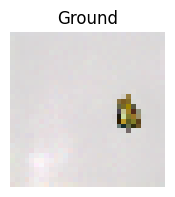

63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - loss: 0.0697  
Epoch 61/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0576
Epoch 62/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0577
Epoch 63/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0792
Epoch 64/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1061
Epoch 65/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0653
Epoch 66/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0590
Epoch 67/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0715
Epoch 68/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0335
Epoch 69/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0811
Epoch 70/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0512
Epoch 71/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0674
Epoch 72/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0585
Epoch 73/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0579
Epoch 74/1000
63/63 ━

Sampling sprite: 1000it [00:56, 17.55it/s]                        


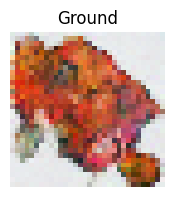

63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - loss: 0.0822  
Epoch 81/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0591
Epoch 82/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0514
Epoch 83/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0530
Epoch 84/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0691
Epoch 85/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0674
Epoch 86/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0748
Epoch 87/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0435
Epoch 88/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0829
Epoch 89/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0798
Epoch 90/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0728
Epoch 91/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0837
Epoch 92/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0643
Epoch 93/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0832
Epoch 94/1000
63/63 ━

Sampling sprite: 1000it [00:57, 17.40it/s]                        


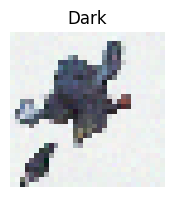

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0703  
Epoch 101/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0453
Epoch 102/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0885
Epoch 103/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0744
Epoch 104/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0621
Epoch 105/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0714
Epoch 106/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0783
Epoch 107/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0817
Epoch 108/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0569
Epoch 109/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0404
Epoch 110/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0514
Epoch 111/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0675
Epoch 112/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0713
Epoch 113/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0643
Epoch 11

Sampling sprite: 1000it [00:56, 17.55it/s]                        


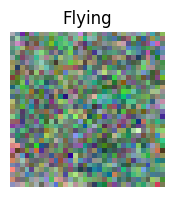

63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - loss: 0.0819  
Epoch 121/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0707
Epoch 122/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0656
Epoch 123/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0564
Epoch 124/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0772
Epoch 125/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0707
Epoch 126/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0609
Epoch 127/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0767
Epoch 128/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0787
Epoch 129/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0691
Epoch 130/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0883
Epoch 131/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0460
Epoch 132/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0654
Epoch 133/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0512
Epoch 13

Sampling sprite: 1000it [00:57, 17.36it/s]                        


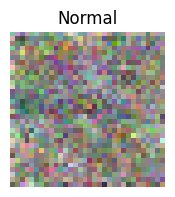

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0824  
Epoch 141/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0730
Epoch 142/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0606
Epoch 143/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0605
Epoch 144/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0474
Epoch 145/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0767
Epoch 146/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0646
Epoch 147/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0941
Epoch 148/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0673
Epoch 149/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0521
Epoch 150/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0557
Epoch 151/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0757
Epoch 152/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0682
Epoch 153/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0910
Epoch 15

Sampling sprite: 1000it [00:57, 17.37it/s]                        


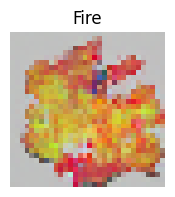

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0691  
Epoch 161/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0529
Epoch 162/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0755
Epoch 163/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0793
Epoch 164/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0692
Epoch 165/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0576
Epoch 166/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0616
Epoch 167/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0548
Epoch 168/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0485
Epoch 169/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0771
Epoch 170/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0601
Epoch 171/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0582
Epoch 172/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0742
Epoch 173/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0624
Epoch 17

Sampling sprite: 1000it [00:57, 17.47it/s]                        


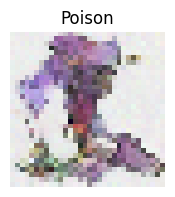

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0792  
Epoch 181/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0645
Epoch 182/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0563
Epoch 183/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0557
Epoch 184/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1082
Epoch 185/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0881
Epoch 186/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0515
Epoch 187/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0598
Epoch 188/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0565
Epoch 189/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0654
Epoch 190/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0676
Epoch 191/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0541
Epoch 192/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0666
Epoch 193/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0746
Epoch 19

Sampling sprite: 1000it [00:57, 17.38it/s]                        


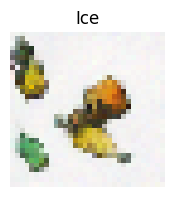

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0577  
Epoch 201/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0851
Epoch 202/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0354
Epoch 203/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0813
Epoch 204/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0680
Epoch 205/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0612
Epoch 206/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0548
Epoch 207/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0602
Epoch 208/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0821
Epoch 209/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0653
Epoch 210/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0904
Epoch 211/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0698
Epoch 212/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0797
Epoch 213/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0751
Epoch 21

Sampling sprite: 1000it [00:57, 17.47it/s]                        


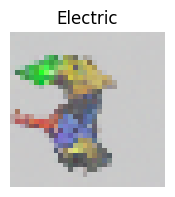

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0685  
Epoch 221/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0502
Epoch 222/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0663
Epoch 223/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0543
Epoch 224/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0527
Epoch 225/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0417
Epoch 226/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0775
Epoch 227/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0678
Epoch 228/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0729
Epoch 229/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0500
Epoch 230/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0591
Epoch 231/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0638
Epoch 232/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0524
Epoch 233/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0750
Epoch 23

Sampling sprite: 1000it [00:57, 17.52it/s]                        


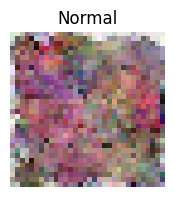

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0577  
Epoch 241/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0651
Epoch 242/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0953
Epoch 243/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0574
Epoch 244/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0666
Epoch 245/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0737
Epoch 246/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0583
Epoch 247/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0510
Epoch 248/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0690
Epoch 249/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0660
Epoch 250/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0486
Epoch 251/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.1029
Epoch 252/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0810
Epoch 253/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0760
Epoch 25

Sampling sprite: 1000it [00:56, 17.68it/s]                        


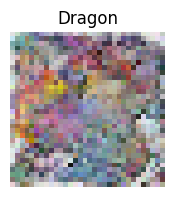

63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - loss: 0.0673  
Epoch 261/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0637
Epoch 262/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0727
Epoch 263/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0569
Epoch 264/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0770
Epoch 265/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0384
Epoch 266/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0776
Epoch 267/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0551
Epoch 268/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0444
Epoch 269/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0544
Epoch 270/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0931
Epoch 271/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0866
Epoch 272/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0665
Epoch 273/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0403
Epoch 27

Sampling sprite: 1000it [00:57, 17.43it/s]                        


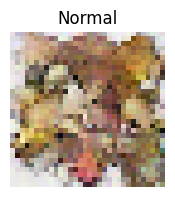

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0745  
Epoch 281/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0483
Epoch 282/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0785
Epoch 283/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0352
Epoch 284/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0599
Epoch 285/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0713
Epoch 286/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0567
Epoch 287/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0723
Epoch 288/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0389
Epoch 289/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0478
Epoch 290/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0624
Epoch 291/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0738
Epoch 292/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0487
Epoch 293/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0535
Epoch 29

Sampling sprite: 1000it [00:58, 17.19it/s]                        


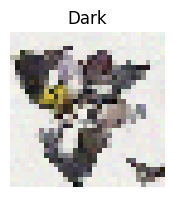

63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - loss: 0.0459  
Epoch 301/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0793
Epoch 302/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0776
Epoch 303/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0667
Epoch 304/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0468
Epoch 305/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0810
Epoch 306/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0405
Epoch 307/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0711
Epoch 308/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0648
Epoch 309/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0602
Epoch 310/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0765
Epoch 311/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0600
Epoch 312/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0941
Epoch 313/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0863
Epoch 31

Sampling sprite: 1000it [00:57, 17.35it/s]                        


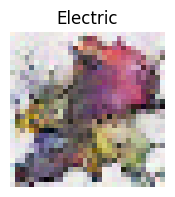

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0363  
Epoch 321/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0746
Epoch 322/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0878
Epoch 323/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0553
Epoch 324/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0515
Epoch 325/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0621
Epoch 326/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0946
Epoch 327/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0665
Epoch 328/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0666
Epoch 329/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0669
Epoch 330/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0741
Epoch 331/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0528
Epoch 332/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0486
Epoch 333/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0572
Epoch 33

Sampling sprite: 1000it [00:57, 17.40it/s]                        


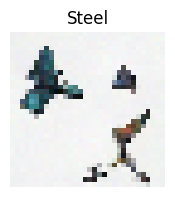

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0642  
Epoch 341/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0475
Epoch 342/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0558
Epoch 343/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0717
Epoch 344/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0420
Epoch 345/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0456
Epoch 346/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0336
Epoch 347/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0430
Epoch 348/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0731
Epoch 349/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0518
Epoch 350/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0583
Epoch 351/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0541
Epoch 352/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0729
Epoch 353/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0575
Epoch 35

Sampling sprite: 1000it [00:57, 17.36it/s]                        


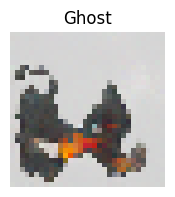

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0408  
Epoch 361/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0703
Epoch 362/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0784
Epoch 363/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0650
Epoch 364/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0609
Epoch 365/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0798
Epoch 366/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0782
Epoch 367/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0745
Epoch 368/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0566
Epoch 369/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0594
Epoch 370/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0951
Epoch 371/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0496
Epoch 372/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0611
Epoch 373/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0778
Epoch 37

Sampling sprite: 1000it [00:56, 17.54it/s]                        


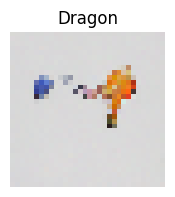

63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - loss: 0.0539  
Epoch 381/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0664
Epoch 382/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0421
Epoch 383/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0575
Epoch 384/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0932
Epoch 385/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0838
Epoch 386/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0666
Epoch 387/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0752
Epoch 388/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0601
Epoch 389/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0675
Epoch 390/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0558
Epoch 391/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0473
Epoch 392/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0520
Epoch 393/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1178
Epoch 39

Sampling sprite: 1000it [00:57, 17.35it/s]                        


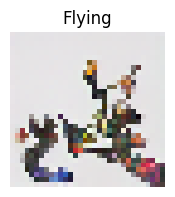

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0565  
Epoch 401/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0793
Epoch 402/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0522
Epoch 403/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0821
Epoch 404/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0522
Epoch 405/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0667
Epoch 406/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0617
Epoch 407/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0619
Epoch 408/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0775
Epoch 409/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0586
Epoch 410/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0773
Epoch 411/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0490
Epoch 412/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0968
Epoch 413/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0487
Epoch 41

Sampling sprite: 1000it [00:57, 17.51it/s]                        


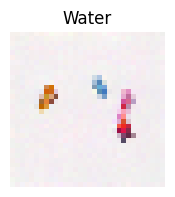

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0782  
Epoch 421/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0791
Epoch 422/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0596
Epoch 423/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0574
Epoch 424/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0589
Epoch 425/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0532
Epoch 426/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0893
Epoch 427/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0590
Epoch 428/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0602
Epoch 429/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0483
Epoch 430/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0913
Epoch 431/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0869
Epoch 432/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0676
Epoch 433/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0550
Epoch 43

Sampling sprite: 1000it [00:57, 17.41it/s]                        


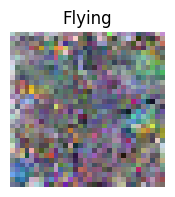

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0621  
Epoch 441/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0616
Epoch 442/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0385
Epoch 443/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0669
Epoch 444/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0664
Epoch 445/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0510
Epoch 446/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0422
Epoch 447/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0557
Epoch 448/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0656
Epoch 449/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0638
Epoch 450/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0405
Epoch 451/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0587
Epoch 452/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0602
Epoch 453/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0544
Epoch 45

Sampling sprite: 1000it [00:57, 17.42it/s]                        


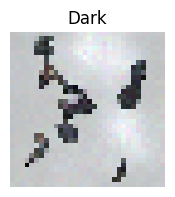

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0741  
Epoch 461/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0753
Epoch 462/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0514
Epoch 463/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0499
Epoch 464/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0385
Epoch 465/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0601
Epoch 466/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0703
Epoch 467/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0595
Epoch 468/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0903
Epoch 469/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0500
Epoch 470/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0487
Epoch 471/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0630
Epoch 472/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0732
Epoch 473/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0750
Epoch 47

Sampling sprite: 1000it [00:56, 17.57it/s]                        


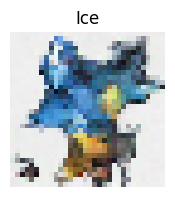

63/63 ━━━━━━━━━━━━━━━━━━━━ 70s 1s/step - loss: 0.0478  
Epoch 481/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0582
Epoch 482/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0465
Epoch 483/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0801
Epoch 484/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0642
Epoch 485/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0735
Epoch 486/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0678
Epoch 487/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0620
Epoch 488/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0529
Epoch 489/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0682
Epoch 490/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0465
Epoch 491/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0378
Epoch 492/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0396
Epoch 493/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0847
Epoch 49

Sampling sprite: 1000it [00:57, 17.38it/s]                        


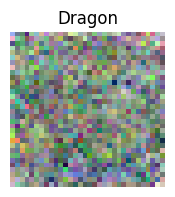

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0746  
Epoch 501/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0624
Epoch 502/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0394
Epoch 503/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0531
Epoch 504/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0802
Epoch 505/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0564
Epoch 506/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0572
Epoch 507/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0792
Epoch 508/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0656
Epoch 509/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0504
Epoch 510/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0590
Epoch 511/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0505
Epoch 512/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0611
Epoch 513/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0448
Epoch 51

Sampling sprite: 1000it [00:57, 17.40it/s]                        


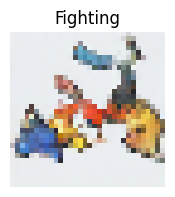

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0630  
Epoch 521/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0519
Epoch 522/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0518
Epoch 523/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0482
Epoch 524/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0524
Epoch 525/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0766
Epoch 526/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0457
Epoch 527/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0585
Epoch 528/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0446
Epoch 529/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0512
Epoch 530/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0617
Epoch 531/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0544
Epoch 532/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0729
Epoch 533/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0552
Epoch 53

Sampling sprite: 1000it [00:57, 17.44it/s]                        


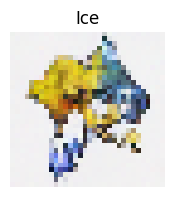

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0674  
Epoch 541/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0531
Epoch 542/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0712
Epoch 543/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0503
Epoch 544/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1013
Epoch 545/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0625
Epoch 546/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0550
Epoch 547/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0482
Epoch 548/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0492
Epoch 549/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0492
Epoch 550/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0619
Epoch 551/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0757
Epoch 552/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0723
Epoch 553/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0670
Epoch 55

Sampling sprite: 1000it [00:57, 17.38it/s]                        


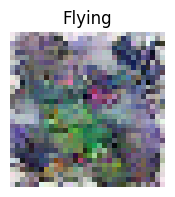

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0475  
Epoch 561/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0521
Epoch 562/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0581
Epoch 563/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0683
Epoch 564/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0890
Epoch 565/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0751
Epoch 566/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0467
Epoch 567/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0375
Epoch 568/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0687
Epoch 569/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0643
Epoch 570/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0651
Epoch 571/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0526
Epoch 572/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0817
Epoch 573/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0770
Epoch 57

Sampling sprite: 1000it [00:57, 17.39it/s]                        


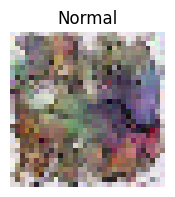

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0644  
Epoch 581/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0658
Epoch 582/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0838
Epoch 583/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0570
Epoch 584/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0635
Epoch 585/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0481
Epoch 586/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0787
Epoch 587/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0465
Epoch 588/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0555
Epoch 589/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0518
Epoch 590/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0516
Epoch 591/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0570
Epoch 592/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1092
Epoch 593/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0416
Epoch 59

Sampling sprite: 1000it [00:58, 17.20it/s]                        


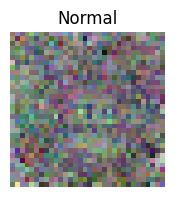

63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - loss: 0.0662  
Epoch 601/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0602
Epoch 602/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0695
Epoch 603/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0651
Epoch 604/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0757
Epoch 605/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0454
Epoch 606/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0504
Epoch 607/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0703
Epoch 608/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0738
Epoch 609/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0553
Epoch 610/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0612
Epoch 611/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0660
Epoch 612/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0564
Epoch 613/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0706
Epoch 61

Sampling sprite: 1000it [00:57, 17.38it/s]                        


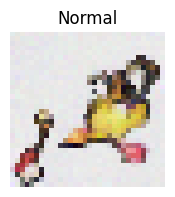

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0623  
Epoch 621/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0697
Epoch 622/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0621
Epoch 623/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0665
Epoch 624/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0775
Epoch 625/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0826
Epoch 626/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0435
Epoch 627/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0632
Epoch 628/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0647
Epoch 629/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0494
Epoch 630/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0581
Epoch 631/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0762
Epoch 632/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0682
Epoch 633/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0546
Epoch 63

Sampling sprite: 1000it [00:57, 17.35it/s]                        


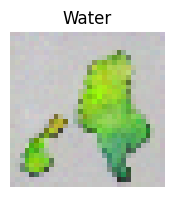

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0853  
Epoch 641/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0734
Epoch 642/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0599
Epoch 643/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0543
Epoch 644/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0744
Epoch 645/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0688
Epoch 646/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0756
Epoch 647/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0545
Epoch 648/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0701
Epoch 649/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0578
Epoch 650/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0828
Epoch 651/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0767
Epoch 652/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0411
Epoch 653/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0582
Epoch 65

Sampling sprite: 1000it [00:57, 17.39it/s]                        


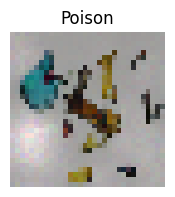

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0608  
Epoch 661/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0617
Epoch 662/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0579
Epoch 663/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0648
Epoch 664/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0626
Epoch 665/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0394
Epoch 666/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0730
Epoch 667/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0771
Epoch 668/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0792
Epoch 669/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0550
Epoch 670/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0545
Epoch 671/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0584
Epoch 672/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0596
Epoch 673/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0619
Epoch 67

Sampling sprite: 1000it [00:57, 17.49it/s]                        


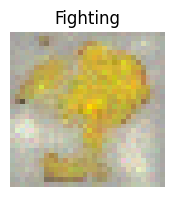

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0873  
Epoch 681/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0565
Epoch 682/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0512
Epoch 683/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0837
Epoch 684/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0521
Epoch 685/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0766
Epoch 686/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0679
Epoch 687/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0630
Epoch 688/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0592
Epoch 689/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0715
Epoch 690/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0888
Epoch 691/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0483
Epoch 692/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0592
Epoch 693/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0634
Epoch 69

Sampling sprite: 1000it [00:58, 17.23it/s]                        


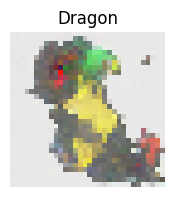

63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - loss: 0.0622  
Epoch 701/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0586
Epoch 702/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0647
Epoch 703/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0502
Epoch 704/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0540
Epoch 705/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0575
Epoch 706/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0558
Epoch 707/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0522
Epoch 708/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0692
Epoch 709/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0475
Epoch 710/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0503
Epoch 711/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0327
Epoch 712/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0591
Epoch 713/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0579
Epoch 71

Sampling sprite: 1000it [00:58, 17.24it/s]                        


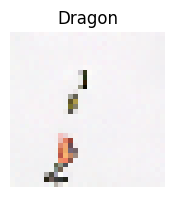

63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - loss: 0.0568  
Epoch 721/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0489
Epoch 722/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0428
Epoch 723/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0554
Epoch 724/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0528
Epoch 725/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0654
Epoch 726/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0352
Epoch 727/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0540
Epoch 728/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0379
Epoch 729/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0611
Epoch 730/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0709
Epoch 731/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0426
Epoch 732/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0413
Epoch 733/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0584
Epoch 73

Sampling sprite: 1000it [00:58, 17.22it/s]                        


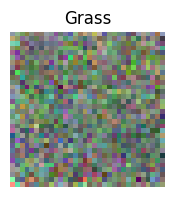

63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - loss: 0.0804  
Epoch 741/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0671
Epoch 742/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0558
Epoch 743/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0639
Epoch 744/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0820
Epoch 745/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0649
Epoch 746/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0543
Epoch 747/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0534
Epoch 748/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0580
Epoch 749/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0505
Epoch 750/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0452
Epoch 751/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0427
Epoch 752/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0683
Epoch 753/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0501
Epoch 75

Sampling sprite: 1000it [00:57, 17.49it/s]                        


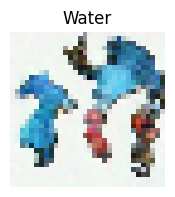

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0453  
Epoch 761/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0446
Epoch 762/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0359
Epoch 763/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0611
Epoch 764/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0676
Epoch 765/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0779
Epoch 766/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0401
Epoch 767/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0659
Epoch 768/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0521
Epoch 769/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0397
Epoch 770/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0594
Epoch 771/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0685
Epoch 772/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.1049
Epoch 773/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0671
Epoch 77

Sampling sprite: 1000it [00:57, 17.41it/s]                        


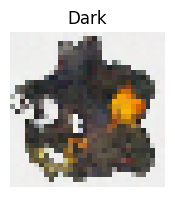

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0782  
Epoch 781/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0428
Epoch 782/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0269
Epoch 783/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0468
Epoch 784/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0601
Epoch 785/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0608
Epoch 786/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0660
Epoch 787/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0656
Epoch 788/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0585
Epoch 789/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0590
Epoch 790/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0407
Epoch 791/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0517
Epoch 792/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0646
Epoch 793/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0706
Epoch 79

Sampling sprite: 1000it [00:58, 17.16it/s]                        


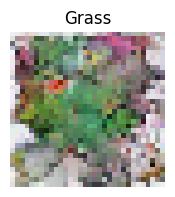

63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - loss: 0.0459  
Epoch 801/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0570
Epoch 802/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0819
Epoch 803/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0544
Epoch 804/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0584
Epoch 805/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0572
Epoch 806/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0642
Epoch 807/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0529
Epoch 808/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0734
Epoch 809/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0939
Epoch 810/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0547
Epoch 811/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0550
Epoch 812/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0575
Epoch 813/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0678
Epoch 81

Sampling sprite: 1000it [00:57, 17.32it/s]                        


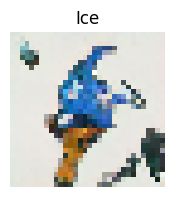

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0692  
Epoch 821/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0661
Epoch 822/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0397
Epoch 823/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0657
Epoch 824/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0585
Epoch 825/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0516
Epoch 826/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0591
Epoch 827/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0427
Epoch 828/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0560
Epoch 829/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0665
Epoch 830/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0463
Epoch 831/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0739
Epoch 832/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0631
Epoch 833/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 206ms/step - loss: 0.0658
Epoch 83

Sampling sprite: 1000it [00:57, 17.32it/s]                        


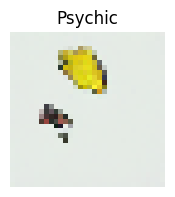

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0499  
Epoch 841/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0492
Epoch 842/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0560
Epoch 843/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0950
Epoch 844/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0755
Epoch 845/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0748
Epoch 846/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0907
Epoch 847/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0568
Epoch 848/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0945
Epoch 849/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0682
Epoch 850/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0610
Epoch 851/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0431
Epoch 852/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0613
Epoch 853/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0686
Epoch 85

Sampling sprite: 1000it [00:57, 17.24it/s]                        


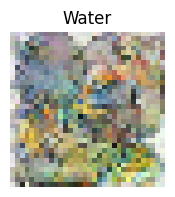

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0655  
Epoch 861/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0478
Epoch 862/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0726
Epoch 863/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0452
Epoch 864/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0480
Epoch 865/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0785
Epoch 866/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0562
Epoch 867/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0779
Epoch 868/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0579
Epoch 869/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0635
Epoch 870/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0816
Epoch 871/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0613
Epoch 872/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0454
Epoch 873/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0671
Epoch 87

Sampling sprite: 1000it [00:57, 17.25it/s]                        


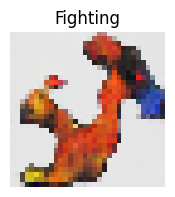

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0795  
Epoch 881/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0668
Epoch 882/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0599
Epoch 883/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.1054
Epoch 884/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0613
Epoch 885/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0656
Epoch 886/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0556
Epoch 887/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0556
Epoch 888/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0789
Epoch 889/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0598
Epoch 890/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0546
Epoch 891/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0843
Epoch 892/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0665
Epoch 893/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0592
Epoch 89

Sampling sprite: 1000it [00:58, 17.05it/s]                        


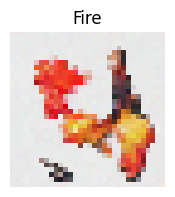

63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - loss: 0.0555  
Epoch 901/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0569
Epoch 902/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0699
Epoch 903/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0654
Epoch 904/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0423
Epoch 905/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0778
Epoch 906/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0582
Epoch 907/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0661
Epoch 908/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0492
Epoch 909/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0788
Epoch 910/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0550
Epoch 911/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0536
Epoch 912/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0621
Epoch 913/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 208ms/step - loss: 0.0404
Epoch 91

Sampling sprite: 1000it [00:57, 17.35it/s]                        


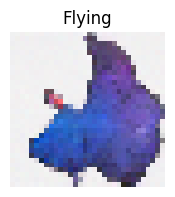

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0397  
Epoch 921/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - loss: 0.0522
Epoch 922/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.1008
Epoch 923/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0661
Epoch 924/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0720
Epoch 925/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0617
Epoch 926/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0663
Epoch 927/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0884
Epoch 928/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0595
Epoch 929/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0743
Epoch 930/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0662
Epoch 931/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0551
Epoch 932/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0573
Epoch 933/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0680
Epoch 93

Sampling sprite: 1000it [00:58, 17.19it/s]                        


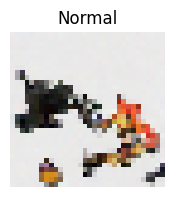

63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - loss: 0.0500  
Epoch 941/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - loss: 0.0458
Epoch 942/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0768
Epoch 943/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0420
Epoch 944/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0641
Epoch 945/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0547
Epoch 946/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0737
Epoch 947/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0653
Epoch 948/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0520
Epoch 949/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0651
Epoch 950/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0554
Epoch 951/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0303
Epoch 952/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0589
Epoch 953/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0760
Epoch 95

Sampling sprite: 1000it [00:57, 17.41it/s]                        


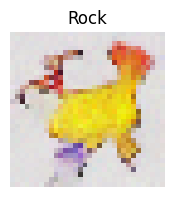

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0740  
Epoch 961/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - loss: 0.0553
Epoch 962/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0509
Epoch 963/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0536
Epoch 964/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0690
Epoch 965/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0580
Epoch 966/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0523
Epoch 967/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0642
Epoch 968/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0492
Epoch 969/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0936
Epoch 970/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0571
Epoch 971/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0728
Epoch 972/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0846
Epoch 973/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0675
Epoch 97

Sampling sprite: 1000it [00:57, 17.39it/s]                        


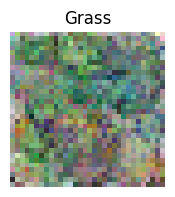

63/63 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - loss: 0.0922  
Epoch 981/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0600
Epoch 982/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0336
Epoch 983/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0870
Epoch 984/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0726
Epoch 985/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0746
Epoch 986/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0489
Epoch 987/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0664
Epoch 988/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0739
Epoch 989/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0646
Epoch 990/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0537
Epoch 991/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0721
Epoch 992/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0727
Epoch 993/1000
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 205ms/step - loss: 0.0530
Epoch 99

Sampling sprite: 1000it [00:58, 17.12it/s]                        


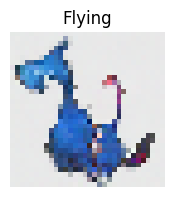

63/63 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - loss: 0.0701  


In [7]:
# tf.config.run_functions_eagerly(True)  # to debug the model
model.fit(poke_dataset, epochs=1000, callbacks=[DiffusionCallback(model, 20)])

Generating sample 1/6


Sampling sprite: 1000it [00:56, 17.73it/s]                        


Generating sample 2/6


Sampling sprite: 1000it [00:55, 18.03it/s]                        


Generating sample 3/6


Sampling sprite: 1000it [00:55, 17.93it/s]                        


Generating sample 4/6


Sampling sprite: 1000it [00:55, 18.15it/s]                        


Generating sample 5/6


Sampling sprite: 1000it [00:56, 17.79it/s]                        


Generating sample 6/6


Sampling sprite: 1000it [00:55, 18.09it/s]                        


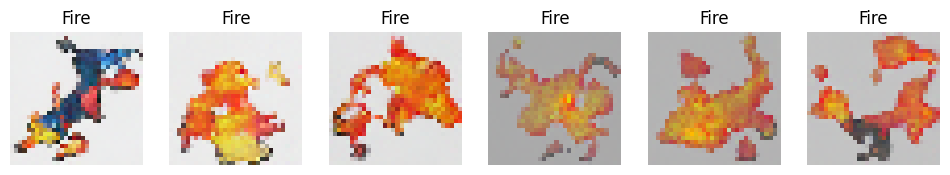

Generating sample 1/6


Sampling sprite: 1000it [00:54, 18.26it/s]                        


Generating sample 2/6


Sampling sprite: 1000it [00:55, 18.13it/s]                        


Generating sample 3/6


Sampling sprite: 1000it [00:55, 18.11it/s]                        


Generating sample 4/6


Sampling sprite: 1000it [00:55, 18.00it/s]                        


Generating sample 5/6


Sampling sprite: 1000it [00:55, 18.04it/s]                        


Generating sample 6/6


Sampling sprite: 1000it [00:55, 18.16it/s]                        


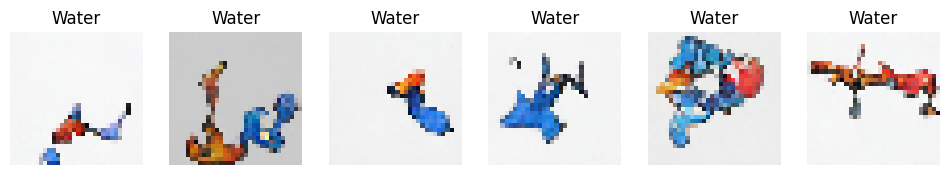

Generating sample 1/6


Sampling sprite: 1000it [00:54, 18.20it/s]                        


Generating sample 2/6


Sampling sprite: 1000it [00:55, 17.97it/s]                        


Generating sample 3/6


Sampling sprite: 1000it [00:55, 17.97it/s]                        


Generating sample 4/6


Sampling sprite: 1000it [00:55, 18.12it/s]                        


Generating sample 5/6


Sampling sprite: 1000it [00:55, 18.12it/s]                        


Generating sample 6/6


Sampling sprite: 1000it [00:55, 18.11it/s]                        


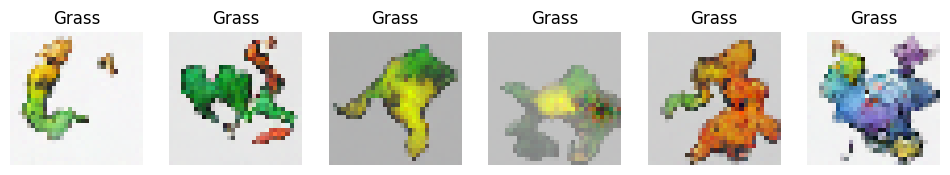

Generating sample 1/6


Sampling sprite: 1000it [00:55, 17.98it/s]                        


Generating sample 2/6


Sampling sprite: 1000it [00:55, 18.06it/s]                        


Generating sample 3/6


Sampling sprite: 1000it [00:55, 18.12it/s]                        


Generating sample 4/6


Sampling sprite: 1000it [00:55, 18.15it/s]                        


Generating sample 5/6


Sampling sprite: 1000it [00:54, 18.20it/s]                        


Generating sample 6/6


Sampling sprite: 1000it [00:55, 17.96it/s]                        


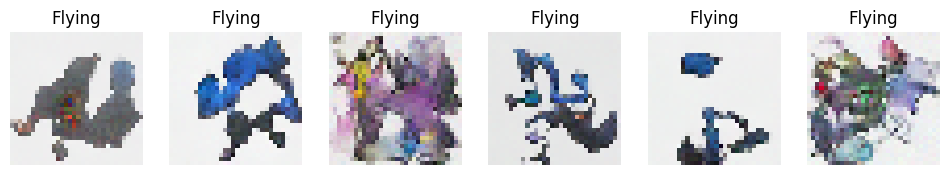

In [8]:
model.plot_samples(6, "Fire")
model.plot_samples(6, "Water")
model.plot_samples(6, "Grass")
model.plot_samples(6, "Flying")

Generating sample 1/6


Sampling sprite: 1000it [00:55, 18.16it/s]                        


Generating sample 2/6


Sampling sprite: 1000it [00:54, 18.20it/s]                        


Generating sample 3/6


Sampling sprite: 1000it [00:54, 18.23it/s]                        


Generating sample 4/6


Sampling sprite: 1000it [00:54, 18.33it/s]                        


Generating sample 5/6


Sampling sprite: 1000it [00:55, 18.13it/s]                        


Generating sample 6/6


Sampling sprite: 1000it [00:54, 18.21it/s]                        


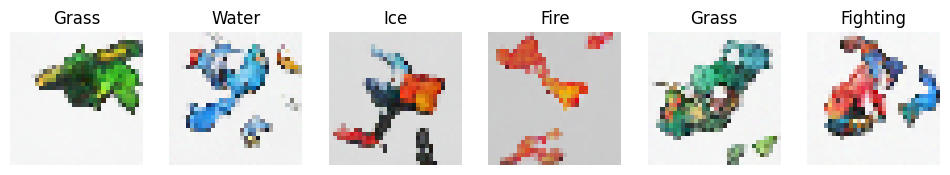

Generating sample 1/6


Sampling sprite: 1000it [00:55, 18.10it/s]                        


Generating sample 2/6


Sampling sprite: 1000it [00:55, 18.18it/s]                        


Generating sample 3/6


Sampling sprite: 1000it [00:54, 18.22it/s]                        


Generating sample 4/6


Sampling sprite: 1000it [00:55, 17.92it/s]                        


Generating sample 5/6


Sampling sprite: 1000it [00:55, 17.88it/s]                        


Generating sample 6/6


Sampling sprite: 1000it [00:55, 17.96it/s]                        


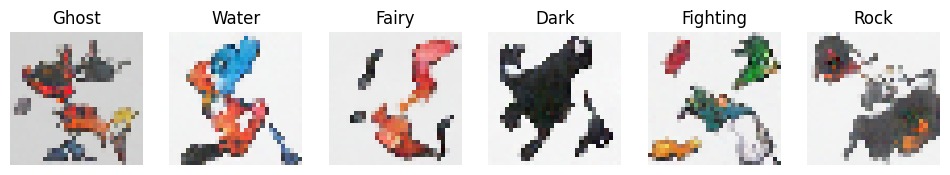

Generating sample 1/6


Sampling sprite: 1000it [00:54, 18.27it/s]                        


Generating sample 2/6


Sampling sprite: 1000it [00:54, 18.26it/s]                        


Generating sample 3/6


Sampling sprite: 1000it [00:55, 18.04it/s]                        


Generating sample 4/6


Sampling sprite: 1000it [00:55, 18.16it/s]                        


Generating sample 5/6


Sampling sprite: 1000it [00:55, 18.15it/s]                        


Generating sample 6/6


Sampling sprite: 1000it [00:54, 18.18it/s]                        


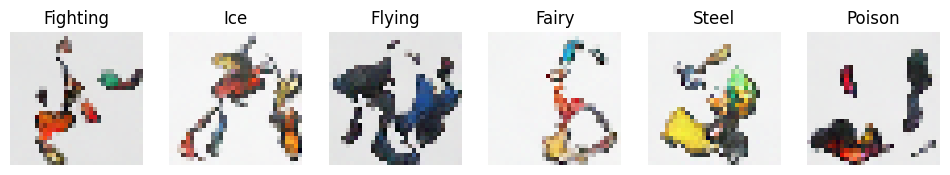

Generating sample 1/6


Sampling sprite: 1000it [00:54, 18.18it/s]                        


Generating sample 2/6


Sampling sprite: 1000it [00:55, 18.03it/s]                        


Generating sample 3/6


Sampling sprite: 1000it [00:55, 17.97it/s]                        


Generating sample 4/6


Sampling sprite: 1000it [00:55, 18.10it/s]                        


Generating sample 5/6


Sampling sprite: 1000it [00:55, 17.97it/s]                        


Generating sample 6/6


Sampling sprite: 1000it [00:55, 17.87it/s]                        


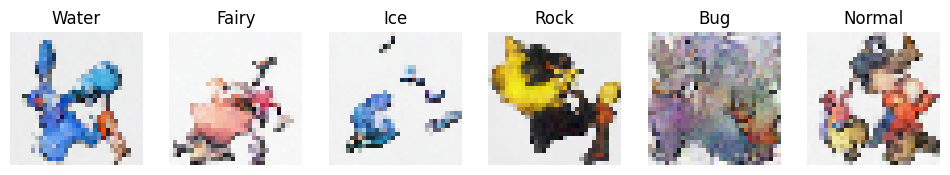

Generating sample 1/6


Sampling sprite: 1000it [00:55, 17.92it/s]                        


Generating sample 2/6


Sampling sprite: 1000it [00:55, 18.04it/s]                        


Generating sample 3/6


Sampling sprite: 1000it [00:55, 17.90it/s]                        


Generating sample 4/6


Sampling sprite: 1000it [00:55, 18.08it/s]                        


Generating sample 5/6


Sampling sprite: 1000it [00:55, 17.99it/s]                        


Generating sample 6/6


Sampling sprite: 1000it [00:55, 18.05it/s]                        


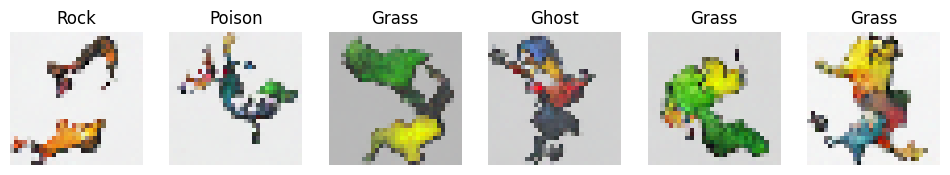

Generating sample 1/6


Sampling sprite: 1000it [00:55, 18.18it/s]                        


Generating sample 2/6


Sampling sprite: 1000it [00:55, 18.12it/s]                        


Generating sample 3/6


Sampling sprite: 1000it [00:55, 18.02it/s]                        


Generating sample 4/6


Sampling sprite: 1000it [00:55, 18.13it/s]                        


Generating sample 5/6


Sampling sprite: 1000it [00:55, 17.92it/s]                        


Generating sample 6/6


Sampling sprite: 1000it [00:54, 18.19it/s]                        


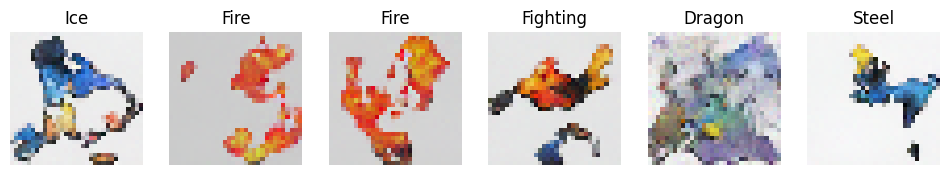

In [9]:
model.plot_samples(6)
model.plot_samples(6)
model.plot_samples(6)
model.plot_samples(6)
model.plot_samples(6)
model.plot_samples(6)

### 2.2. Save Model

Finalmente, se guardan los resultados finales del modelo de difusión en un fichero `.h5` para su posterior uso y visualización. TODO: MIRAR OTROS FORMATOS DE GUARDADO

TODO: INVESTIGAR OTROS FORMATOS DE GUARDADO (HDF5, PICKLE, ETC.)

In [10]:
# Save the model function
# =====================================================================
def save_model(model: tf.keras.models.Model, model_name: str) -> None:
    """Saves the model

    :param model: The model to save
    :param model_name: The name of the model
    :return: None
    """

    # Save the model
    model_dir = "../../models/"
    os.makedirs(model_dir, exist_ok=True)
    if not os.path.exists(os.path.join(model_dir, f"{model_name}.h5")):
        model.save(os.path.join(model_dir, f"{model_name}.keras"))
        print(f"Model {model_name}, saved successfully!")
    else:
        print(f"Model {model_name}, already exists!")

In [11]:
# Save the model
SCHEDULER = "linear"
EPOCHS = 1500
model_name = f"diffusion_{IMG_SIZE}_{BATCH_SIZE}_{EPOCHS}_{T}_{SCHEDULER}_ddpm_attention_time_sin"

save_model(model, model_name)

/home/pqlza/.local/lib/python3.11/site-packages/keras/src/saving/saving_api.py:100: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  saving_lib.save_model(model, filepath)


Model diffusion_32_64_1500_1000_linear_ddpm_attention_time_sin, saved successfully!


In [ ]:
# # load the model
# # =====================================================================
# model_loaded = tf.keras.models.load_model(f"../../models/{model_name}.keras")

# model_load.plot_samples(6)

[BACK TO TOP](#test)

In [ ]:
# Import necessary libraries
# =====================================================================
import os

# Configurar el nivel de logging para mostrar solo errores
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

import configparser
import tensorflow as tf
import pandas as pd

# Import src code
from src.model.model_build import *
from src.utils.utils import PROJECT_DIR, DATA_PATH
from src.visualization import visualize
from src.model.overfitting_test import *
from src.data.create_dataset import dataset_tf
from src.data.path_loader import PathLoader

In [ ]:
# Use the GPU
# =====================================================================
gpus_list = tf.config.list_physical_devices("GPU")
gpu = gpus_list[0]
tf.config.experimental.set_memory_growth(gpu, True)

print("GPUs Available: ", gpus_list)

GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# Set config file
# =====================================================================
config = configparser.ConfigParser()
config.read(PROJECT_DIR / "config.ini")

# Hyperparameters
config_hp = config["hyperparameters"]

IMG_SIZE = 32
NUM_CLASSES = int(config_hp["num_classes"])
BATCH_SIZE = 64
EPOCHS = 500
T = 1000
BETA_START = float(config_hp["beta_start"])
BETA_END = float(config_hp["beta_end"])
s = float(config_hp["s"])  # scale factor for the variance curve
SCHEDULER = config_hp["scheduler"]

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # TODO: ADD TO CONFIG FILE
loss_fn = tf.keras.losses.MeanSquaredError()

## 1. Dataset

- The shape of the dataset is: (32, 64, 64, 3) => batch_size: 32, height: 64, width: 64, channels: 3
- The shape of the dataset labels is: (32, 18) => batch_size: 32, number of labels: 18


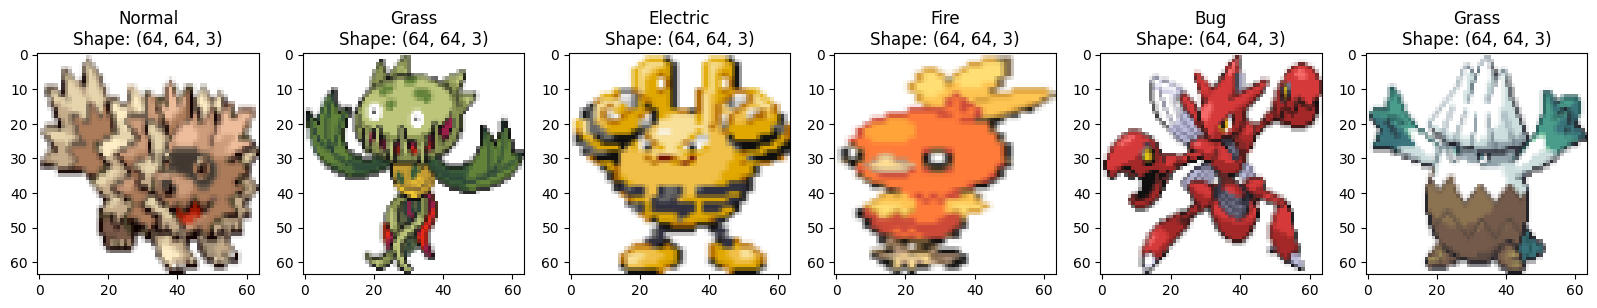

In [ ]:
# Load csv data
# =====================================================================
path = f"{DATA_PATH}/processed/pokedex_cleaned.csv"
df = pd.read_csv(path)

dataset_path = f"{DATA_PATH}/processed/pokemon_tf_dataset"
# poke_dataset = tf.data.Dataset.load(path=dataset_path, compression="GZIP")

poke_dataset = dataset_tf(
    image_paths=PathLoader.get_image_paths(f"{DATA_PATH}/interim/image_paths.json"),
    df=df,
    img_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    save=False,
    save_path=dataset_path,
)

# Check the dataset
# =====================================================================
for img, label in poke_dataset.take(1):
    print(
        f"- The shape of the dataset is: {img.shape} => batch_size: {img.shape[0]}, height: {img.shape[1]}, width: {img.shape[2]}, channels: {img.shape[3]}"
    )
    print(
        f"- The shape of the dataset labels is: {label.shape} => batch_size: {label.shape[0]}, number of labels: {label.shape[1]}"
    )

# Visualize the dataset
visualize.plot_images_batch(dataset_tf=poke_dataset, n=6)

## 2. Model

In [ ]:
# Create the model
# =====================================================================
u_net = build_unet(IMG_SIZE, NUM_CLASSES, num_channels=128, embedding_dim=128)
loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

model = DiffusionModel(
    u_net, IMG_SIZE, NUM_CLASSES, T, BETA_START, BETA_END, s, "linear"
)

# Compile the model
# =====================================================================
model.compile(loss=loss_fn, optimizer=optimizer)

### 2.1. Training

In [ ]:
# tf.config.run_functions_eagerly(True)  # to debug the model
model.fit(poke_dataset, epochs=EPOCHS, callbacks=[DiffusionCallback(model, 20)])

In [ ]:
# tf.config.run_functions_eagerly(True)  # to debug the model
model.fit(poke_dataset, epochs=1000, callbacks=[DiffusionCallback(model, 20)])

In [ ]:
model.plot_samples(6, "Fire")
model.plot_samples(6, "Water")
model.plot_samples(6, "Grass")
model.plot_samples(6, "Flying")

In [ ]:
model.plot_samples(6)
model.plot_samples(6)
model.plot_samples(6)
model.plot_samples(6)
model.plot_samples(6)
model.plot_samples(6)

### 2.2. Save Model

Finalmente, se guardan los resultados finales del modelo de difusión en un fichero `.h5` para su posterior uso y visualización. TODO: MIRAR OTROS FORMATOS DE GUARDADO

TODO: INVESTIGAR OTROS FORMATOS DE GUARDADO (HDF5, PICKLE, ETC.)

In [ ]:
# Save the model function
# =====================================================================
def save_model(model: tf.keras.models.Model, model_name: str) -> None:
    """Saves the model

    :param model: The model to save
    :param model_name: The name of the model
    :return: None
    """

    # Save the model
    model_dir = "../../models/"
    os.makedirs(model_dir, exist_ok=True)
    if not os.path.exists(os.path.join(model_dir, f"{model_name}.h5")):
        model.save(os.path.join(model_dir, f"{model_name}.keras"))
        print(f"Model {model_name}, saved successfully!")
    else:
        print(f"Model {model_name}, already exists!")

In [ ]:
# Save the model
SCHEDULER = "linear"
EPOCHS = 1500
model_name = f"diffusion_{IMG_SIZE}_{BATCH_SIZE}_{EPOCHS}_{T}_{SCHEDULER}_ddpm_attention_time_sin"

save_model(model, model_name)

/home/pqlza/.local/lib/python3.11/site-packages/keras/src/saving/saving_api.py:100: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  saving_lib.save_model(model, filepath)


Model diffusion_32_64_1100_500_linear_ddpm_attention_time_sin, saved successfully!


In [ ]:
# # load the model
# # =====================================================================
# model_loaded = tf.keras.models.load_model(f"../../models/{model_name}.keras")

# model_load.plot_samples(6)

[BACK TO TOP](#test)